# <b><u>0) Ensemble des variables à modifier en début d'exécution du Notebook, selon l'exploitation qu'on veut en faire.</u></b>

In [ ]:
# Booléen d'activation (ou non) de l'installation des modules/librairies nécessaires au bon fonctionnement de ce Notebook (cf partie 1.1) du Notebook).
installation = False
# Chemin de données (local) vers me répertoire de rangement de la base de donnée initiale, telle que disponible en ligne (cf partie 2) du Notebook).
abs_path_b2d = "C:/Users/luked/Documents/Formation_Ingenieur_ML/Projets/P4/B2D/"
# Liste de noms des fichiers dans lesquels sont enregistrées les bases de données initiales
title_b2d_tab = [
    "olist_customers_dataset",
    "olist_geolocation_dataset",
    "olist_order_items_dataset",
    "olist_order_payments_dataset",
    "olist_order_reviews_dataset",
    "olist_orders_dataset",
    "olist_products_dataset",
    "olist_sellers_dataset",
    "product_category_name_translation",
]
# Chemin de données (local) vers le repertoire de rangement de la base de donnée finale, après réduction et nettoyage.
# Factuellement, on a choisit de la ranger dans le même répertoire que la base de donnée initiale.
abs_path_b2d_rednet = abs_path_b2d
# Nom du fichier dans lequel on veut enregistrer la base de donnée finale.
title_b2d_rednet = "b2d_rednet.csv"
# Sauvegarde des figures et chemin de données vers répertoire de stockage
sauvegarde_figure, abs_path_fig = (
    False,
    "C:/Users/luked/Documents/Formation_Ingenieur_ML/Projets/P4/Figures/Analyse/",
)

# 
# <b><u>I) Installations et importations des libriaries/modules python utiles pour ce Notebbok.</u></b>
 
## <b><u>I1.1) Installation (sautez cette étape si vous les avez déjà sur votre ordinateur).</u></b>
### !!! LA LIBRAIRIE MISSINGNO EST DONNEE EN RESSOURCE DU PROJET N°2. IL FAUDRA PEUT ÊTRE LA METTRE DANS LE MEME REPERTOIRE DE RANGEMENT QUE CE NOTEBOOK !!!
### Lien vers cette librairie : https://github.com/ResidentMario/missingno

In [ ]:
# Installation conditionnée au booléen précédent
if installation:
    ! pip install missingno
    ! pip install datetime


## <b><u>I.2) Importations.</u></b>

In [3]:
from missingno.missingno import bar, matrix, np, pd, plt, sns
import datetime as dtm

## <b><u>I.3) Définitions de fonctions personnelles.</u></b>

# 
# <b><u>II) Chargement des bases de données.</u></b>
## Les base de données ont été téléchargées manuellement depuis le site suivant : https://www.kaggle.com/olistbr/brazilian-ecommerce. Elle ont ensuite été répertoriées en local, mais pas dans le même répertoire que ce notebook.
## !!! Part la suite, on y fera référence sous l'abréviation 'b2d' !!!

In [4]:
# dictionnaire dans laquelle on va ranger les b2d chargées
b2d_tab = {title: pd.read_csv(abs_path_b2d + title + ".csv") for title in title_b2d_tab}

# 
# <b><u>III) Analyses des bases de données.</u></b>
## 
## <b><u>III.1) Analyse de : <i>olist_customers_dataset</i>.</u></b>

In [5]:
# Création d'une varibale locale pour faciliter notre travail, qui est une copie de la B2D "olist_customers_dataset"
df = b2d_tab["olist_customers_dataset"].copy(deep=True)
# Affichage de qlqs lignes pour se faire une idée des infos qu'elle contient :
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


### 
### <b><u>III.1.a) Analyse sommaire.</u></b>
### Cette B2D contient des informations sur les clients, ceux qu'on cherche à segmenter (identifiants, et localisation géographique). Ces informations sont donc potentiellement particulièrement immportantes à nos yeux. 
### Une 1ère interrogation : pourquoi deux identifiants : <i>customer_id</i> et <i>customer_id_unique</i> ? Faisons une analyse de l'unicités des valeurs prises par les éléments de cette B2D pour cex deux identifiants.

In [6]:
for col in ["customer_id", "customer_unique_id"]:
    print(
        f"Pour la variable {col : >20}, il y a {df[col].unique().shape[0]} valeurs possibles pour {df.shape[0]} éléments dans la B2D."
    )
# On efface les variables devenues inutiles
del col

Pour la variable          customer_id, il y a 99441 valeurs possibles pour 99441 éléments dans la B2D.
Pour la variable   customer_unique_id, il y a 96096 valeurs possibles pour 99441 éléments dans la B2D.


### Seule <i>customer_id</i> a un taux d'unicité de 100%. Cela pourrait signifier que :
#### - <i>customer_unique_id</i> est l'identifiant d'authentification formelle de chaque client ;
#### - <i>customer_id</i> est un identifiant correspondant à une action numérique (par ex : connexion/commande/etc).
### Passons à la recheche de NaN dans cette B2D.

### 
### <b><u>III.1.b) Analyse des NaN.</u></b>

In [7]:
# Calcul du nombre de NaN par colonne :
df.isna().sum(axis=0)

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### Excellent, pas de réduction de dimension ni d'imputation à faire ici. Passons à de l'analyse plus poussée, grâce notamment au paramètre <i>customer_unique_id</i>.
### 
### <b><u>III.1.c) Analyse des consommateurs.</u></b>
### Affichons l'histogramme du nombre d'apparition par valeur unique de <i>customer_unique_id</i>

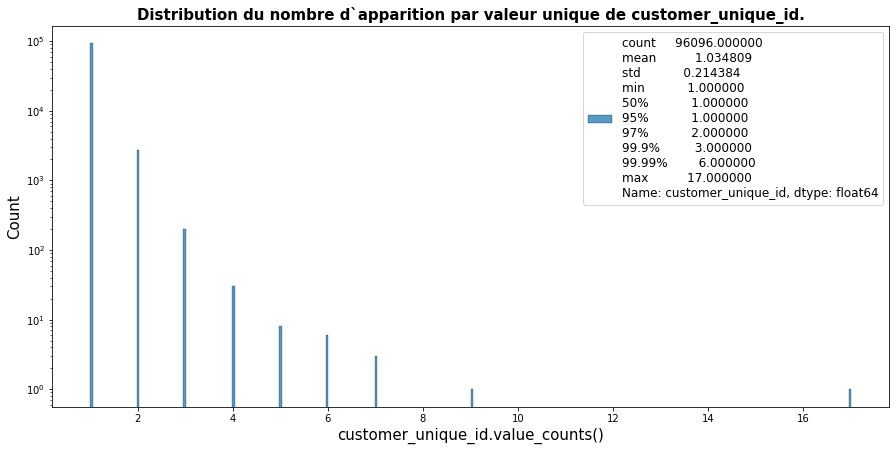

In [8]:
plt.figure(
    "Distribution du nombre d`apparition par valeur unique de customer_unique_id",
    figsize=(15, 7),
), plt.clf()
axe, data = plt.subplot(111), df["customer_unique_id"].copy(deep=True).value_counts()
axe.set_title(
    "Distribution du nombre d`apparition par valeur unique de customer_unique_id.",
    fontdict={"fontsize": 15, "fontweight": "bold"},
), axe.set_ylabel(axe.get_ylabel(), fontsize=15), axe.set_xlabel(
    "customer_unique_id.value_counts()", fontsize=15
)
axe.set_yscale("log")
sns.histplot(
    data=data,
    ax=axe,
    bins="sqrt",
    label=data.describe(percentiles=[0.95, 0.97, 0.999, 0.9999]),
), axe.legend(loc="best", fontsize=12)
if sauvegarde_figure:
    plt.savefig(abs_path_fig + "1_distrib_nb_appar_customer_unique_id.png")
del axe, data

### Confirmation de la description du projet : seulement ~ 3% des clients reviennent faire des commandes, ce qui tendrait à prouver un certain degré de satisfaction des performances du site Olist. Y-a-t'il un lien entre géolocalisation et le fait de revenenir au moins une fois faire une commande ?

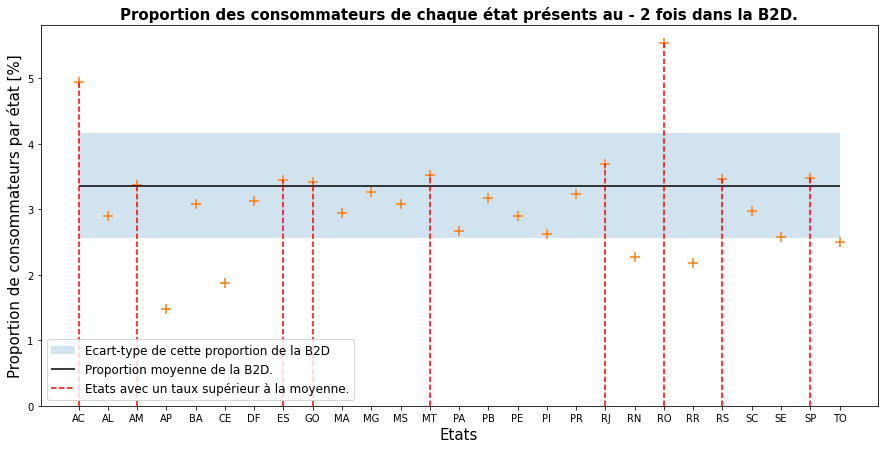

In [9]:
plt.figure(
    "Proportion par état de ses consommateurs présents au - 2 fois dans la B2D.",
    figsize=(15, 7),
), plt.clf()
axe, data, seuil = (
    plt.subplot(111),
    100
    * df.loc[df["customer_unique_id"].duplicated()]["customer_state"]
    .value_counts()
    .sort_index()
    / df["customer_state"].value_counts().sort_index(),
    100 * (df.shape[0] - df["customer_unique_id"].unique().shape[0]) / df.shape[0],
)
axe.set_title(
    "Proportion des consommateurs de chaque état présents au - 2 fois dans la B2D.",
    fontdict={"fontsize": 15, "fontweight": "bold"},
), axe.set_ylabel(
    "Proportion de consommateurs par état [%]", fontsize=15
), axe.set_xlabel(
    "Etats", fontsize=15
)
axe.fill_between(
    x=data.keys(),
    y1=seuil + data.values.std(),
    y2=seuil - data.values.std(),
    label="Ecart-type de cette proportion de la B2D",
    alpha=0.2,
), axe.hlines(
    y=seuil,
    xmin=data.keys()[0],
    xmax=data.keys()[-1],
    label="Proportion moyenne de la B2D.",
)
axe.scatter(data.keys(), data.values, marker="+", s=100), axe.set_ylim(
    [0, data.max() * 1.05]
), axe.vlines(
    data.keys()[data.values >= seuil],
    ymin=0,
    ymax=data.values[data.values >= seuil],
    color="red",
    linestyle="--",
    label="Etats avec un taux supérieur à la moyenne.",
)
axe.legend(loc="best", fontsize=12)
if sauvegarde_figure:
    plt.savefig(abs_path_fig + "2_proportion_consom_plus_1_fois_par_etat.png")
del axe, data, seuil, df

### Neuf états présentent un taux de consommateurs récurrents supérieur à la moyenne, mais seulement deux (AC et RO) présentent un taux nettement supérieur. La réciproque est vraie pour les états avec un taux inférieur à la moyenne : peu d'entre eux (AP, CE, RN, RR) semblent vraiment plus défavorables à la récurrence de leurs consommateurs. 
### On ne peut donc pas conclure que la répartition géographique (en tout cas au sens de l'état d'appartenance) ait un impact sur la fréquence de solicitation des services du site Olist.

## 
## <b><u>III.2) Analyse de : <i>olist_geolocation_dataset</i>.</u></b>

In [10]:
# Création d'une varibale locale pour faciliter notre travail, qui est une copie de la B2D "olist_customers_dataset"
df = b2d_tab["olist_geolocation_dataset"].copy(deep=True)
# Affichage de qlqs lignes pour se faire une idée des infos qu'elle contient :
df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


### 
### <b><u>III.2.a) Analyse sommaire, et unicités.</u></b>
### Cette B2D contient des informations sur la géolocalisation. Elle doit sans doute pouvoir servir de référence/dictionnaire d'associations Villes <-> Etats <-> Zip Code <-> Coordonnées GPS.

In [11]:
for col in df.columns:
    print(
        f"Pour la variable {col : >30}, il y a {df[col].unique().shape[0] : 7.0f} valeurs possibles pour {df.shape[0]} éléments dans la B2D."
    )
# On efface les variables devenues inutiles
del col

Pour la variable    geolocation_zip_code_prefix, il y a   19015 valeurs possibles pour 1000163 éléments dans la B2D.
Pour la variable                geolocation_lat, il y a  717358 valeurs possibles pour 1000163 éléments dans la B2D.
Pour la variable                geolocation_lng, il y a  717613 valeurs possibles pour 1000163 éléments dans la B2D.
Pour la variable               geolocation_city, il y a    8011 valeurs possibles pour 1000163 éléments dans la B2D.
Pour la variable              geolocation_state, il y a      27 valeurs possibles pour 1000163 éléments dans la B2D.


In [12]:
print(
    f"Il y a{df.duplicated().sum() : 6.0f} lignes redondantes dans cette B2D (dont{df[df.columns[[1,2]]].duplicated().sum() : 6.0f} pour les seules coordonnées GPS), soit ~{100*df.duplicated().sum()/df.shape[0] :3.0f}% des lignes de cette B2D."
)

Il y a 261831 lignes redondantes dans cette B2D (dont 281700 pour les seules coordonnées GPS), soit ~ 26% des lignes de cette B2D.


### C'est un taux énorme. Eliminons ces lignes "dupliquées" redondantes.

In [13]:
# ELiminations effective
b2d_tab["olist_geolocation_dataset"].drop_duplicates(inplace=True, ignore_index=True)
# on refait la copie de la B2D
df = b2d_tab["olist_geolocation_dataset"].copy(deep=True)

### On contrôle que l'unicité des colonnes soit conservée :

In [14]:
for col in df.columns:
    print(
        f"Pour la variable {col : >30}, il y a désormais{df[col].unique().shape[0] : 7.0f} valeurs possibles pour {df.shape[0]} éléments dans la B2D."
    )
# On efface les variables devenues inutiles
del col

Pour la variable    geolocation_zip_code_prefix, il y a désormais  19015 valeurs possibles pour 738332 éléments dans la B2D.
Pour la variable                geolocation_lat, il y a désormais 717358 valeurs possibles pour 738332 éléments dans la B2D.
Pour la variable                geolocation_lng, il y a désormais 717613 valeurs possibles pour 738332 éléments dans la B2D.
Pour la variable               geolocation_city, il y a désormais   8011 valeurs possibles pour 738332 éléments dans la B2D.
Pour la variable              geolocation_state, il y a désormais     27 valeurs possibles pour 738332 éléments dans la B2D.


### 
### <b><u>III.2.b) Analyse des NaN.</u></b>

In [15]:
# Calcul du nombre de NaN par colonne :
df.isna().sum(axis=0)

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

### Excellent. Pas de PB de ce point de vue là.
### 
### <b><u>III.2.c) Analyse de la provenance géographique des données.</u></b>

### Tout va bien jusqu'ici. Au fait, d'où proviennent ces données ? (On utilise seulement une franction de la B2D tant il y a d'éléments, et le code couleur représente l'état correspondant)

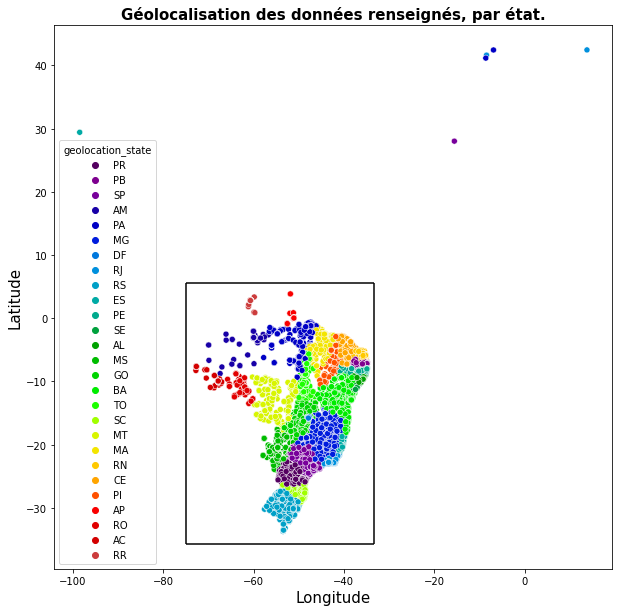

In [16]:
### Affichage de la géolocalisation des états
plt.figure("Geoloc des états", figsize=(10, 10)), plt.clf()
axe = plt.subplot(111)
axe.set_title(
    "Géolocalisation des données renseignés, par état.",
    fontdict={"fontsize": 15, "fontweight": "bold"},
), axe.set_ylabel("Latitude", fontsize=15), axe.set_xlabel("Longitude", fontsize=15)
# Carré empyrique contenant les données émanant du brésil
x1, x2 = (
    df["geolocation_lng"].mean() - 6.5 * df["geolocation_lng"].std(),
    df["geolocation_lng"].mean() + 3 * df["geolocation_lng"].std(),
)
y1, y2 = (
    df["geolocation_lat"].mean() - 2.5 * df["geolocation_lat"].std(),
    df["geolocation_lat"].mean() + 4.5 * df["geolocation_lat"].std(),
)
axe.vlines(x=[x1, x2], ymin=y1, ymax=y2), axe.hlines(y=[y1, y2], xmin=x1, xmax=x2)
sns.scatterplot(
    data=df[["geolocation_lat", "geolocation_lng", "geolocation_state"]].sample(
        frac=0.1, random_state=420
    ),
    y="geolocation_lat",
    x="geolocation_lng",
    hue="geolocation_state",
    ax=axe,
    palette="nipy_spectral",
)
if sauvegarde_figure:
    plt.savefig(abs_path_fig + "3_geoloca_data_par_etat.png")
del axe

### Il est intéressant de voir que certaines données proviennent de l'étranger. Et encore, l'échantillonnage aléatoire réalisé pour accélérer la production de la figure précédente en masque peut-être certaines. Caclulons le nombre total de données provenant d'en dehors des frontières brésiliennes (grâce aux variavbles empyriques <i>x1</i>, <i>x2</i>, <i>y1</i> et <i>y2</i> calculés précédemment pour la production du dernier graphes.

In [17]:
# Booléen d'appartenance à des coordonnées GPS à l'intérieur du rectangle empyrique précédent
cond = np.logical_and(
    np.logical_and(df["geolocation_lat"] >= y1, df["geolocation_lat"] <= y2),
    np.logical_and(df["geolocation_lng"] >= x1, df["geolocation_lng"] <= x2),
)
# On calcule quels éléments ne ve=érifient PAS ces conditions
df_hors_brésil = df.copy(deep=True).mask(cond).dropna(axis=0, how="all")
print(
    f"{df_hors_brésil.shape[0]} éléments, soit{100*df_hors_brésil.shape[0]/df.shape[0] : 6.4f}% des éléments de cette B2D correspondent à des endroits en dehors des frontières Brésil"
)
del cond, df_hors_brésil, df

31 éléments, soit 0.0042% des éléments de cette B2D correspondent à des endroits en dehors des frontières Brésil


### Ils ont trop peu nombreux et non représentatifs de la B2D qu'il n'est pas intéressant (pour l'instant) de leur accorder plus de tmps d'analyse.

## 
## <b><u>III.3) Analyse de : <i>olist_order_items_dataset</i>.</u></b>

In [18]:
# Création d'une varibale locale pour faciliter notre travail, qui est une copie de la B2D "olist_order_items_dataset"
df = b2d_tab["olist_order_items_dataset"].copy(deep=True)
# Affichage de qlqs lignes pour se faire une idée des infos qu'elle contient :
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


### 
### <b><u>III.3.a) Analyse sommaire, et unicités.</u></b>
### Cette B2D contient des informations faisant le lien entre produits, commandes et vendeurs (entre autres).

In [19]:
for col in df.columns:
    print(
        f"Pour la variable {col : >20}, il y a {df[col].unique().shape[0] : 7.0f} valeurs possibles pour {df.shape[0]} éléments dans la B2D."
    )
# On efface les variables devenues inutiles
del col

Pour la variable             order_id, il y a   98666 valeurs possibles pour 112650 éléments dans la B2D.
Pour la variable        order_item_id, il y a      21 valeurs possibles pour 112650 éléments dans la B2D.
Pour la variable           product_id, il y a   32951 valeurs possibles pour 112650 éléments dans la B2D.
Pour la variable            seller_id, il y a    3095 valeurs possibles pour 112650 éléments dans la B2D.
Pour la variable  shipping_limit_date, il y a   93318 valeurs possibles pour 112650 éléments dans la B2D.
Pour la variable                price, il y a    5968 valeurs possibles pour 112650 éléments dans la B2D.
Pour la variable        freight_value, il y a    6999 valeurs possibles pour 112650 éléments dans la B2D.


### Il n'y a jamais d'unicité totale des colonnes, y compris pour celles qui a priori concernent des identifiants. Cela signifie que, de la même manière qu'on a des clients récurrents, on a des vendeurs récurrents/produits plus populaires que les autres, et il sera intéressant de venir les analyser. On est quand même un peu surpris que les commandes ne soient pas elles uniques...
### On calcule le nombre de lignes "dupliquées" redondantes :

In [20]:
df.duplicated().sum()

0

### Parfait !

### 
### <b><u>III.3.b) Analyse des NaN.</u></b>

In [21]:
# Calcul du nombre de NaN par colonne :
df.isna().sum(axis=0)

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### Parfait !

### 
### <b><u>III.3.c) Analyse de certains identifiants.</u></b>
### De façon analogue à ce qu'on avait fait en section (III.1.c), penchons nous sur les différents identifiants présents dans cette B2D [i.e. : suffixes en <i>_id</i>]. Traçons les histogrammes des fréquence d'apparitions des valeurs uniques de ces identifiants :

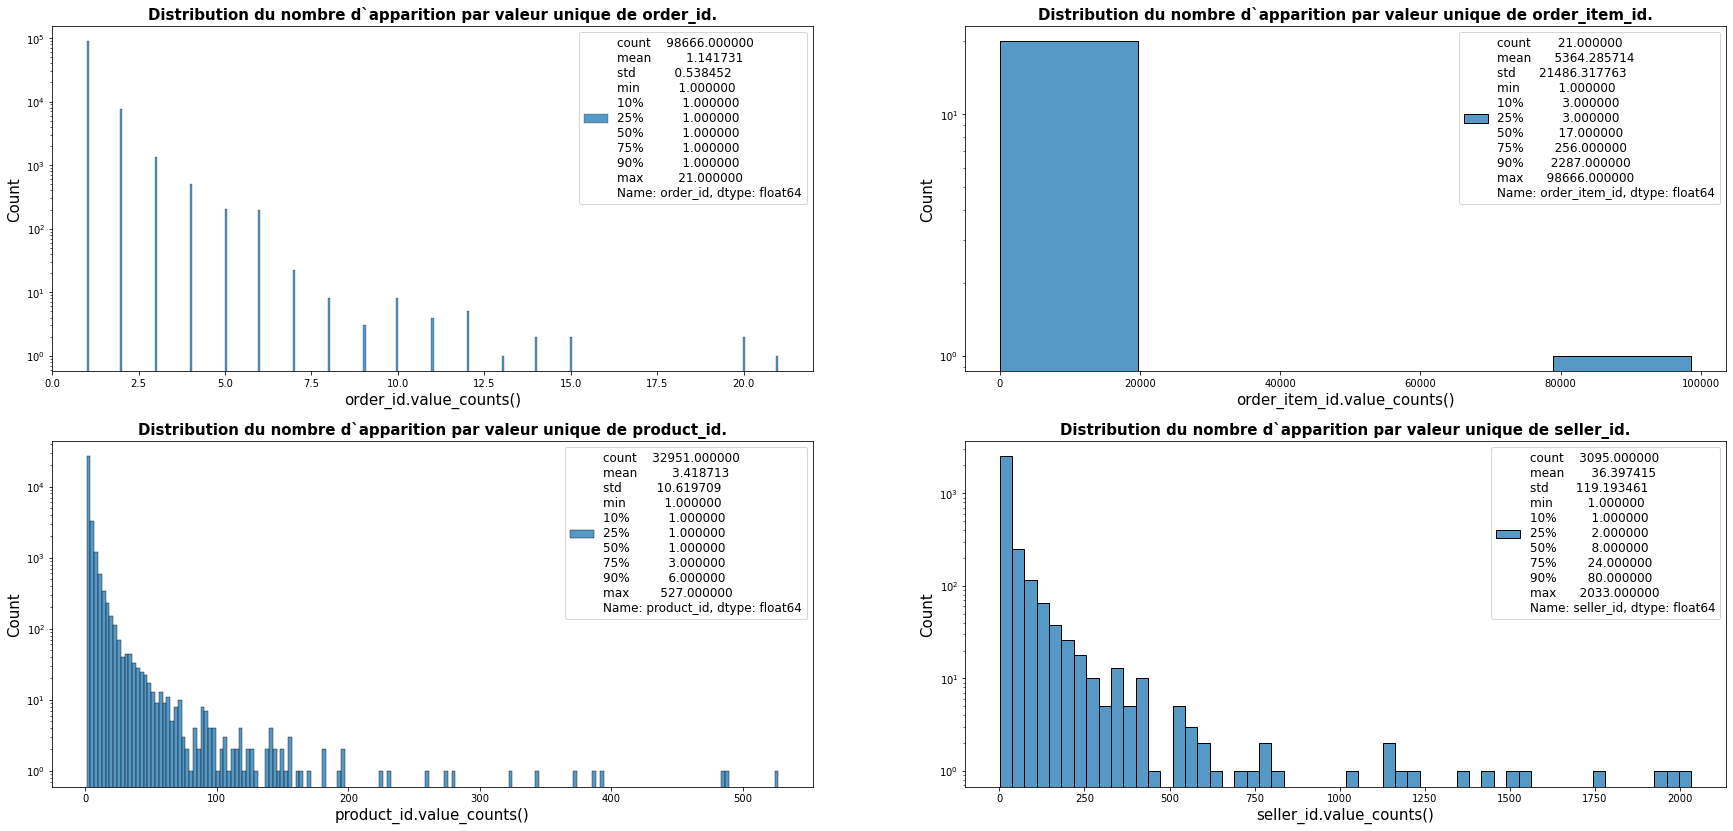

In [22]:
plt.figure(
    "Distribution du nombre d`apparition par valeur unique des id de olist_order_items_dataset",
    figsize=(15 * 2, 7 * 2),
), plt.clf()
for col, i in zip(df.columns[:4], range(1, 5)):
    axe, data = plt.subplot(2, 2, i), df[col].copy(deep=True).value_counts()
    axe.set_title(
        f"Distribution du nombre d`apparition par valeur unique de {col}.",
        fontdict={"fontsize": 15, "fontweight": "bold"},
    ), axe.set_ylabel(axe.get_ylabel(), fontsize=15), axe.set_xlabel(
        f"{col}.value_counts()", fontsize=15
    )
    axe.set_yscale("log")
    sns.histplot(
        data=data, ax=axe, bins="sqrt", label=data.describe([0.1, 0.25, 0.5, 0.75, 0.9])
    ), axe.legend(loc="best", fontsize=12)
if sauvegarde_figure:
    plt.savefig(abs_path_fig + "4_distrib_valuecounts_order_product_seller.png")
del axe, data, col, i

### Hormis pour le cas particulier de <i>order_item_id</i> (dont les catégories elles mêmes sont des nomnbres entiers) et qu'on ne traitera en fait pas ici, on retrouve, comme en section (III.1.c) des fréquences d'apparitions dominées par l'apparition unique, ce qui est particulièrement vrai pour <i>order_id</i>, et est à nuancer pour <i>product_id</i> et <i>seller_id</i>. Cela est finalement logique : on s'attednrait à ce que chaque commande soit unique, quand au contraire il n'est pas étonnant que certains produits soient très demandés (sous les effets de mode, par ex), ou encore que certains vendeurs soient beaucoup plus actifs que d'autres (ceratins sont habitués semi-pro, quand la plupart sont des vendeurs occasionnels).
### Par rapport aux autres colonnes de cette B2D, on pourrait donc se demander si les identifiants revenant plus d'une fois sont corrélés à certaines plages de prix et de frais de ports :


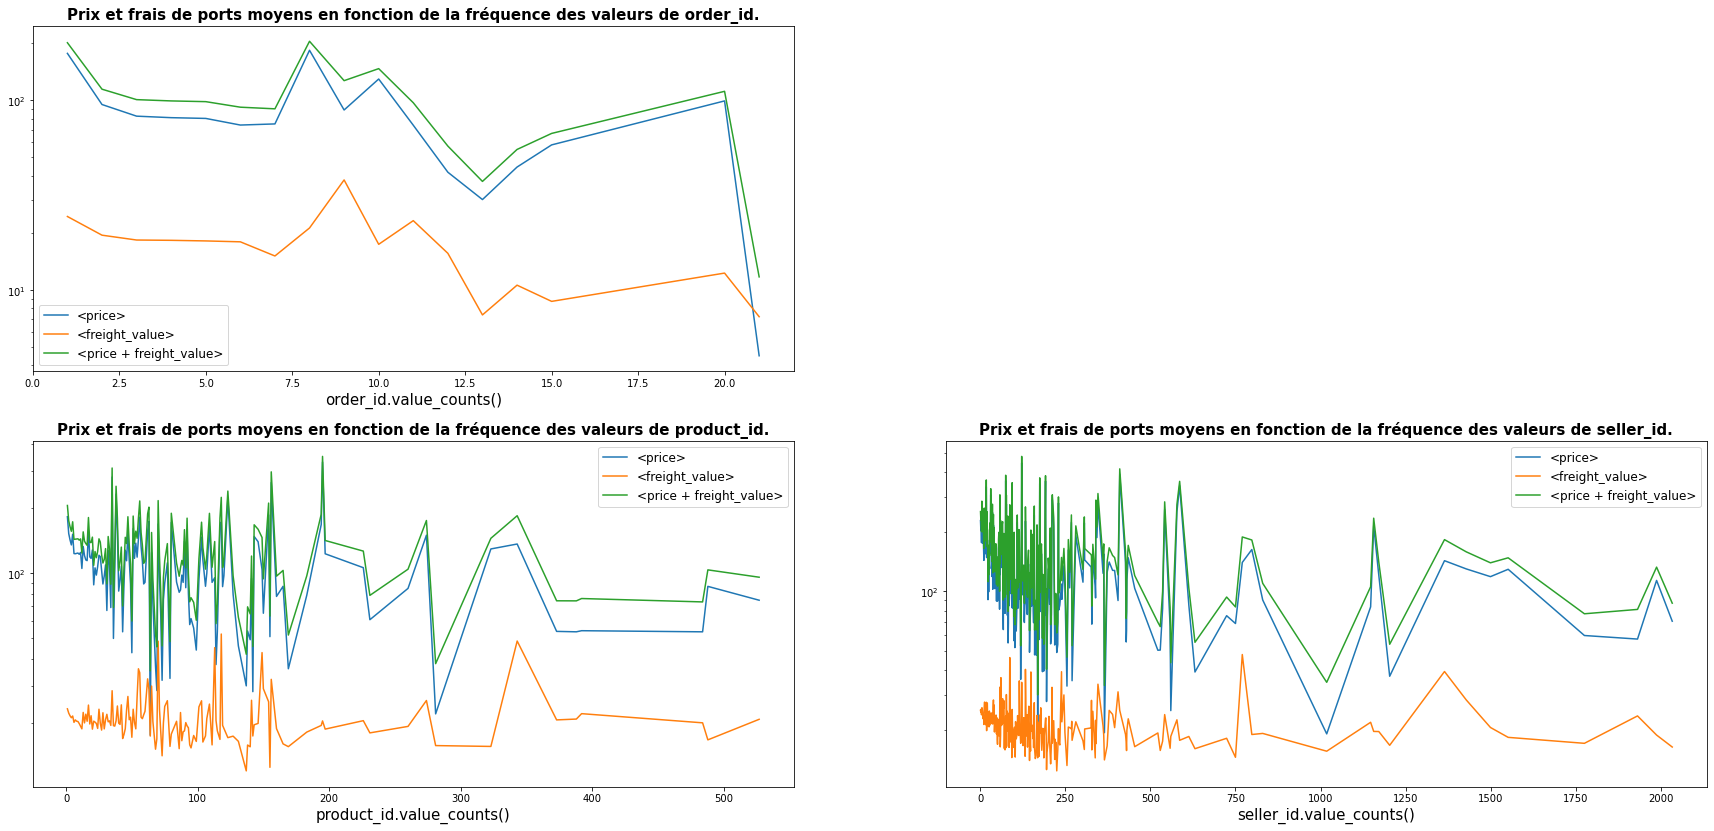

In [23]:
plt.figure(
    "Analyse multi-variée des olist_order_items_dataset en fonction de price et freight value",
    figsize=(15 * 2, 7 * 2),
), plt.clf()
for col, i in zip(["order_id", "product_id", "seller_id"], [1, 3, 4]):
    ### Calcul des df[['p,rice','freight_value']] restreints aux éléments ayant la fréquence d'apparition courante
    tab_moy = []
    for freq in df[col].value_counts().unique():
        dfbis = (
            pd.DataFrame(
                data=df[["price", "freight_value"]].values,
                index=df[col].values,
                columns=["price", "freight_value"],
            )
            .loc[df[col].value_counts().keys()[df[col].value_counts() == freq]]
            .drop_duplicates()
        )
        tab_moy.append(
            list(np.concatenate((dfbis.mean().values, [dfbis.sum(axis=1).mean()])))
        )
    tab_moy = np.array(tab_moy)
    ### Représentation graphique
    axe = plt.subplot(2, 2, i)
    axe.set_title(
        f"Prix et frais de ports moyens en fonction de la fréquence des valeurs de {col}.",
        fontdict={"fontsize": 15, "fontweight": "bold"},
    ), axe.set_ylabel(axe.get_ylabel(), fontsize=15), axe.set_xlabel(
        f"{col}.value_counts()", fontsize=15
    )
    axe.plot(df[col].value_counts().unique(), tab_moy[:, 0], label="<price>"), axe.plot(
        df[col].value_counts().unique(), tab_moy[:, 1], label="<freight_value>"
    ), axe.plot(
        df[col].value_counts().unique(), tab_moy[:, 2], label="<price + freight_value>"
    )
    axe.set_yscale("log"), axe.legend(loc="best", fontsize=12)
if sauvegarde_figure:
    plt.savefig(
        abs_path_fig + "5_depnses_fonction_valuecounts_order_product_seller.png"
    )
del axe, col, i, freq, dfbis, tab_moy

### Comme on le voit, on est loin d'avoir une décroissance systématique et monotone des prix/fraits de ports/sommes des deux avec la fréquence d'apparition des identifiants des commandes/produits/vendeurs.
### On ne peut donc pas conclure en l'état que ces coûts ont une incidence sur la fréquence d'apparition de ces identifiants.

## 
## <b><u>III.4) Analyse de : <i>olist_order_payments_dataset</i>.</u></b>

In [24]:
# Création d'une varibale locale pour faciliter notre travail, qui est une copie de la B2D "olist_order_items_dataset"
df = b2d_tab["olist_order_payments_dataset"].copy(deep=True)
# Affichage de qlqs lignes pour se faire une idée des infos qu'elle contient :
df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


### 
### <b><u>III.4.a) Analyse sommaire, et unicités.</u></b>
### Cette B2D contient des informations au sujet du paiement de chaque commande (en combien de fois, par quel mode de débit, montant).

In [25]:
for col in df.columns:
    print(
        f"Pour la variable {col : >20}, il y a {df[col].unique().shape[0] : 7.0f} valeurs possibles pour {df.shape[0]} éléments dans la B2D."
    )
# On efface les variables devenues inutiles
del col

Pour la variable             order_id, il y a   99440 valeurs possibles pour 103886 éléments dans la B2D.
Pour la variable   payment_sequential, il y a      29 valeurs possibles pour 103886 éléments dans la B2D.
Pour la variable         payment_type, il y a       5 valeurs possibles pour 103886 éléments dans la B2D.
Pour la variable payment_installments, il y a      24 valeurs possibles pour 103886 éléments dans la B2D.
Pour la variable        payment_value, il y a   29077 valeurs possibles pour 103886 éléments dans la B2D.


### Au passage, on remarque d'emblée qu'il y a quasiment autant de valeurs unique de <i>order_id</i> pour cette B2D qu'il y en avait dans la précédente (98666). Est-ce qu'il s'agit des mêmes valeurs ?

In [26]:
np.intersect1d(
    df["order_id"].unique(),
    b2d_tab["olist_order_items_dataset"]["order_id"].unique(),
    assume_unique=True,
).shape

(98665,)

### A une seule commande près, toutes les identifiants <i>order_id</i> de la B2D précédente sont contenus parmis les ceux de <i>olist_order_payments_dataset</i>. C'est de bonne augure pour la cohérence d'une B2D à une autre.
### Pour ce qui est des éléments redondants éventuels au sein de cette B2D :

In [27]:
df.duplicated().sum()

0

### Il n'y en a toujours pas. Très bien.

### 
### <b><u>III.4.b) Analyse des NaN.</u></b>

In [28]:
# Calcul du nombre de NaN par colonne :
df.isna().sum(axis=0)

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### De même, toujours pas la moindre NaN !

### 
### <b><u>III.4.c) Analyses mono-variées.</u></b>

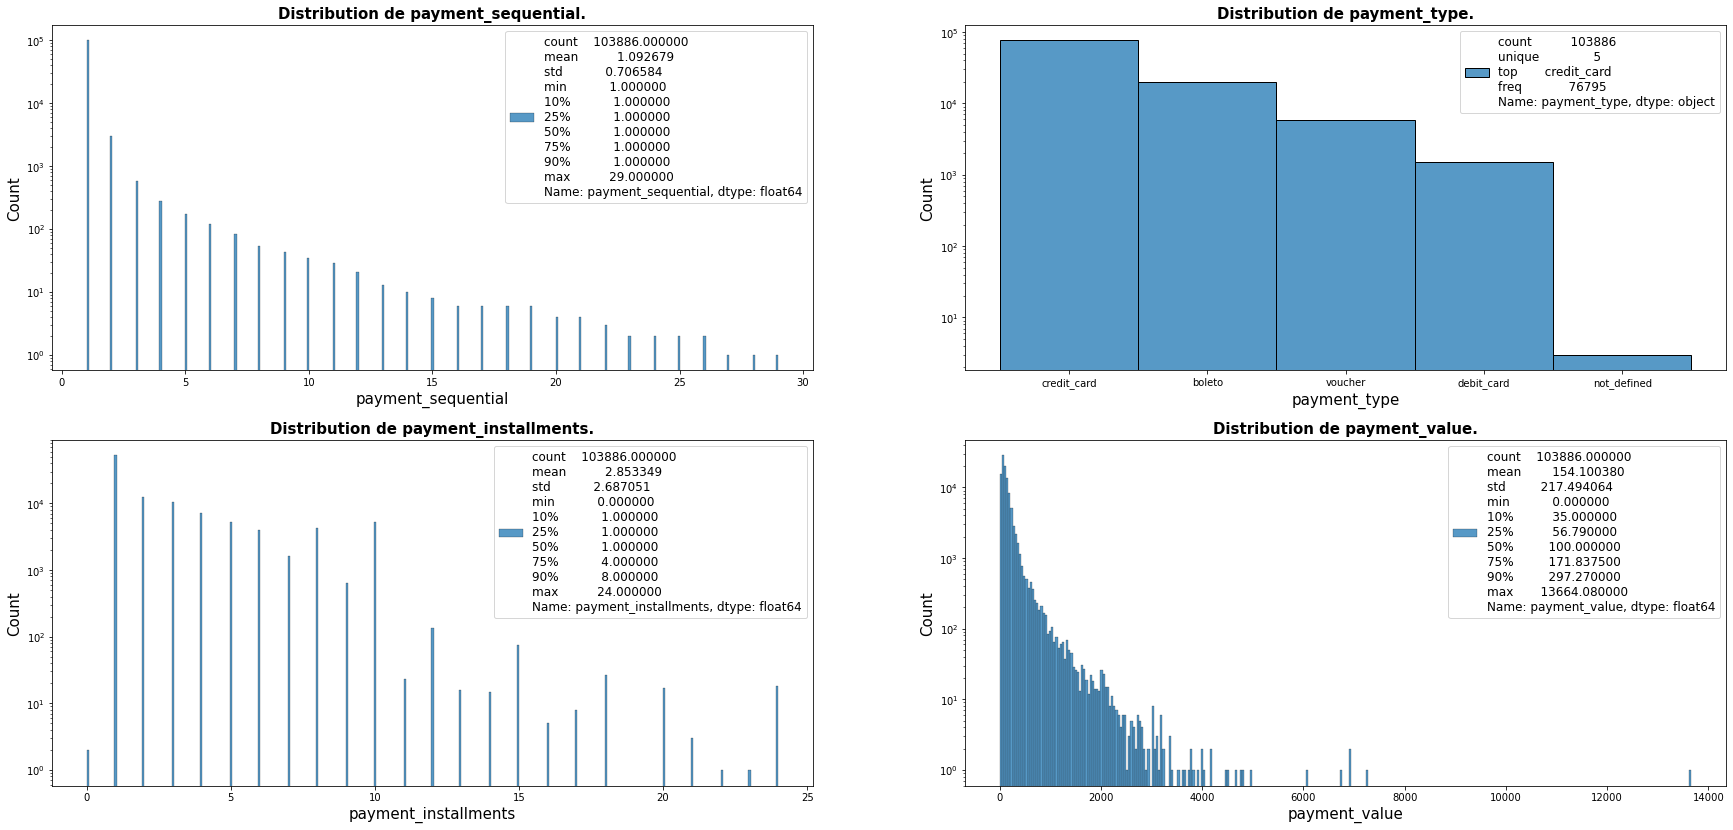

In [29]:
plt.figure(
    "Distributions mono-variées olist_order_payments_dataset", figsize=(15 * 2, 7 * 2)
), plt.clf()
for col, i in zip(df.columns[1:], range(1, df.shape[1])):
    axe, data = plt.subplot(2, 2, i), df[col]
    axe.set_title(
        f"Distribution de {col}.", fontdict={"fontsize": 15, "fontweight": "bold"}
    ), axe.set_ylabel(axe.get_ylabel(), fontsize=15), axe.set_xlabel(
        f"{col}", fontsize=15
    )
    axe.set_yscale("log")
    sns.histplot(
        data=data, ax=axe, bins="sqrt", label=data.describe([0.1, 0.25, 0.5, 0.75, 0.9])
    ), axe.legend(loc="best", fontsize=12)
if sauvegarde_figure:
    plt.savefig(abs_path_fig + "6_distrib_mono_var_olist_order_payments_dataset.png")
del axe, data, col, i

In [30]:
df.groupby("payment_type")["payment_sequential"].describe(
    percentiles=np.arange(0.1, 1, 0.1)
)

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
payment_type,,,,,,,,,,,,,,
boleto,19784.0,1.000051,0.007110,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
credit_card,76795.0,1.004167,0.064619,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
debit_card,1529.0,1.034663,0.186527,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
not_defined,3.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
voucher,5775.0,2.602424,2.550195,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,5.0,29.0


### Seul le mode de paiement <i>voucher</i> [par bons] se distinguent nettement des autres, par une nombre de <i>payment_sequential</i> plus régulièrement supérieur à 1. C'est d'ailleurs cette classe de paiement qui porte l'essentiel de la variance de <i>payment_sequential</i>.

In [31]:
df.groupby("payment_type")["payment_installments"].describe(
    percentiles=np.arange(0.1, 1, 0.1)
)

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
payment_type,,,,,,,,,,,,,,
boleto,19784.0,1.000000,0.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
credit_card,76795.0,3.507155,2.85099,0.0,1.0,1.0,1.0,2.0,3.0,3.0,4.0,6.0,8.0,24.0
debit_card,1529.0,1.000000,0.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
not_defined,3.0,1.000000,0.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
voucher,5775.0,1.000000,0.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Ici, seul le mode de paiement <i>credit ccard</i> peut conduire à un nombre de versement supérieur à 1, tous les autres modes de paiement correspondent uniquement à 1 seul versement par commande.

In [32]:
df.groupby("payment_type")["payment_value"].describe(percentiles=np.arange(0.1, 1, 0.1))

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
payment_type,,,,,,,,,,,,,,
boleto,19784.0,145.034435,213.581061,11.62,36.840,49.198,62.368,76.080,93.89,116.230,142.920,181.330,267.780,7274.88
credit_card,76795.0,163.319021,222.119311,0.01,38.164,54.208,69.160,86.640,106.87,131.860,162.290,206.990,314.920,13664.08
debit_card,1529.0,142.570170,245.793401,13.38,35.536,44.792,57.456,71.622,89.30,110.594,138.916,177.406,249.644,4445.50
not_defined,3.0,0.000000,0.000000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.00
voucher,5775.0,65.703354,115.519185,0.00,6.698,14.100,20.000,28.000,39.28,50.000,66.548,98.544,136.664,3184.34


### La carte de crédit concerne des paiements en moyenne 15% plus élevés que pour les mode de pauiement <i>boleto</i> [par billets] et <i>debit_card</i>. Le mode de paiement <i>voucher</i> concerne lui des paiements nettement plus bas que pour les 3 autres modes de paiements (ce qui est assez longique, sociologiquement parlant, les bons d'achats étant souvent et surtout utilisés par des personnes de classes sociales plutôt défavorisées, plutôt âgées, et pour des produits "ordinaires" (alimentaire et dans une moindre mesure petit électro-ménager)).

### 
### <u><b>III.4.d) Réduction de dimension :</b></u>
### On supprime les 3 éléments de la catégorie <i>not_defined</i> de la colonne <i>payment_type</i>, car :
#### - par nature (catégorie faite pour éviter de mettre une NaN) cette catégorie ne nous apprend rien (confirmé par les descriptions statistiques précédentes) ;
#### - 3 éléments sur des dizaines de milliers... autant s'éviter le risque de sur-apprentissage qu'ils induiraient...

In [33]:
# indices correspondats à ces éléments :
indx = df[df["payment_type"] == "not_defined"].index
# Suppression effective
b2d_tab["olist_order_payments_dataset"].drop(index=indx, inplace=True)
# redéfinission de df
df = b2d_tab["olist_order_payments_dataset"].copy(deep=True)

## 
## <b><u>III.5) Analyse de : <i>olist_order_reviews_dataset</i>.</u></b>

In [34]:
# Création d'une varibale locale pour faciliter notre travail, qui est une copie de la B2D "olist_order_items_dataset"
df = b2d_tab["olist_order_reviews_dataset"].copy(deep=True)
# Affichage de qlqs lignes pour se faire une idée des infos qu'elle contient :
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


### 
### <b><u>III.5.a) Analyse sommaire, et unicités.</u></b>
### Cette B2D contient des informations au sujet de l'évaluation d'appréciation de chaque commande (commentaire, note).

In [35]:
for col in df.columns:
    print(
        f"Pour la variable {col : >25}, il y a {df[col].unique().shape[0] : 7.0f} valeurs possibles pour {df.shape[0]} éléments dans la B2D."
    )
# On efface les variables devenues inutiles
del col

Pour la variable                 review_id, il y a   98410 valeurs possibles pour 99224 éléments dans la B2D.
Pour la variable                  order_id, il y a   98673 valeurs possibles pour 99224 éléments dans la B2D.
Pour la variable              review_score, il y a       5 valeurs possibles pour 99224 éléments dans la B2D.
Pour la variable      review_comment_title, il y a    4528 valeurs possibles pour 99224 éléments dans la B2D.
Pour la variable    review_comment_message, il y a   36160 valeurs possibles pour 99224 éléments dans la B2D.
Pour la variable      review_creation_date, il y a     636 valeurs possibles pour 99224 éléments dans la B2D.
Pour la variable   review_answer_timestamp, il y a   98248 valeurs possibles pour 99224 éléments dans la B2D.


### Quasi unicité totale pour les paramètres <i>review_id</i>, <i>order_id</i> et <i>review_answer_timestamp</i>, ce qui est assez logique finalement (jusqu'à un avis par commande, et jusqu'à une réponse -donc un horodatage de réponse- par avis). Le peu de valeurs uniques pour <i>review_creation_date</i> a de quoi surprendre.
### Comme en section III.4.a, on regarde combien de valeurs uniques de cette colonne sont communes à sa colonne homonyme des B2D précédentes <i>olist_order_items_dataset</i> et <i>olist_order_payments_dataset</i> :

In [36]:
for b2d in ["olist_order_items_dataset", "olist_order_payments_dataset"]:
    nb_communes = np.intersect1d(
        df["order_id"].unique(), b2d_tab[b2d]["order_id"].unique(), assume_unique=True
    ).shape[0]
    print(
        f"Le paramètre order_id de cette B2D a {nb_communes} valeurs unique communes avec la B2D {b2d}."
    )
del b2d, nb_communes

Le paramètre order_id de cette B2D a 97917 valeurs unique communes avec la B2D olist_order_items_dataset.
Le paramètre order_id de cette B2D a 98669 valeurs unique communes avec la B2D olist_order_payments_dataset.


### Quasiment toutes sont communes, c'est rassurant.
### Quant aux éléments "dupliqués" redondants de cette B2D : et bien il n'y en a toujours pas.

In [37]:
df.duplicated().sum()

0

### 
### <b><u>III.5.b) Analyse des NaN.</u></b>

In [38]:
# Calcul du nombre de NaN par colonne :
df.isna().sum(axis=0)

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

### Enfin ! Nos 1ères NaN sont portées par deux colonnes, qui concernent les éventuels commentaires laissés en avis des commandes (titre et message). Voyons quelques exemples des valeurs les plus fréquentes (et les moins fréquentes) prises par ces deux paramètres.

In [39]:
df["review_comment_message"].value_counts()

Muito bom                                                                                  230
Bom                                                                                        189
muito bom                                                                                  122
bom                                                                                        107
Recomendo                                                                                  100
                                                                                          ... 
Muito bom! Aquilo que esperava!                                                              1
Eu amei o produto e comprometimento com a data da entrega,chegou bem antes.\r\nParabéns      1
Até agora estou aguardando a entrega da mercadoria, empresa não cumpriu com a data.          1
Produto chegou perfeito.                                                                     1
Nao recebi meus produtos ainda                    

In [40]:
df["review_comment_title"].value_counts()

Recomendo                   423
recomendo                   345
Bom                         293
super recomendo             270
Excelente                   248
                           ... 
Excelente empresa             1
Vezzo não é mais o mesmo      1
Silvan                        1
Avaliação da entrega          1
Satisfação do. Cliente        1
Name: review_comment_title, Length: 4527, dtype: int64

### Outre le PB de la barrière de la langue, ce genre d'information exprimée sous cette forme de chaînes de caractères peut être très difficilement manipulable, car il s'agit de phrases potentiellement longues, sans respect de structure systématique d'un élément de la B2D à un autre. 
### Cependant, ces informations pourraient nous être utile pour compléter la mesure de satisfaction des certains consommateur ; nous avons donc intérêt à ne pas nous débarasser de ces colonnes.
### <u>CHOIX FORT :</u> On décide de faire de l'IMPUTATION de valeurs, en mettant '' à la place des NaN, ce qui permet de conserver les colonnes, et de signaler l'absence de commentaires. Même si c'est un niveau d'information binaire, une présence de commentaire tendrait à signifier deux cas opposés : satisfaction ou insatisfaction, mais assez intenses, alors que l'absence de commentaire irait plutôt dans le sens d'une forme de neutralité.

In [41]:
# recherche des indices des NaN de ces deux colonnes
ind_nan_mes, ind_nan_tit = (
    df.index[df["review_comment_message"].isna()],
    df.index[df["review_comment_title"].isna()],
)
# imputation de valeur effective
(
    b2d_tab["olist_order_reviews_dataset"].loc[ind_nan_mes, "review_comment_message"],
    b2d_tab["olist_order_reviews_dataset"].loc[ind_nan_tit, "review_comment_title"],
) = ("", "")
# on re-crée la copie de la B2D
df = b2d_tab["olist_order_reviews_dataset"].copy(deep=True)
# Affichage
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,,,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,,,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,,,2018-07-01 00:00:00,2018-07-02 12:59:13


### 
### <b><u>III.5.c) Analyses mono-variées/muti-variées.</u></b>
#### 
####  <b><u> Lien entre le review_score et la présence/absence de commentaires d'avis.</u></b>
### Tentons d'ailleurs de vérifier ce qu'on vient de supposer sur l'intensité de satisfaction/insatisfaction et le fait de laisser un avis. On va regarder les scores selon qu'il y a on non commentaire...
### On commence par la distribution des scores d'avis pour l'ensemble des éléments de la B2D, afin d'avoir un repère en terme de proportions globales :

In [42]:
print("Score ; % de ce score parmis l`ensemble des éléments de cette B2D")
100 * df["review_score"].value_counts().sort_index() / df["review_score"].shape[0]

Score ; % de ce score parmis l`ensemble des éléments de cette B2D


1    11.513344
2     3.175643
3     8.242965
4    19.291704
5    57.776344
Name: review_score, dtype: float64

### Les avis sont très majoritairement excellents, avec près de 60% des éléments ayant une note maximale, et plus de 75% des éléments ont une note > à la note moyenne.
### Calculons les mêmes pourcentages de répartition des notes, mais pour l'ensemble des éléments SANS message d'avis.

In [43]:
print(
    f"Pour {int(100*len(ind_nan_mes)/df.shape[0])}% de lignes sans message d`avis, le score de satisfaction moyen est de {df[df.columns[2]][ind_nan_mes].mean() : 3.1f} +-{df[df.columns[2]][ind_nan_mes].std() : 3.1f}"
)
print("Score ; % de ce score parmis les éléments sans message d`avis")
100 * df["review_score"][ind_nan_mes].value_counts().sort_index() / len(
    ind_nan_mes
)  # df['review_score'].value_counts().sort_index()

Pour 58% de lignes sans message d`avis, le score de satisfaction moyen est de  4.4 +- 1.0
Score ; % de ce score parmis les éléments sans message d`avis


1     4.599379
2     1.727128
3     7.935173
4    22.603739
5    63.134582
Name: review_score, dtype: float64

### Bingo, il y a sur-représentation des deux meilleures possibles, et au contraire sous-représentation des mauvaises notes (en particulier la plus basse). Au contraire, pour ce qui est des messages avec avis :

In [44]:
print(
    f"Pour {int(100*(df.shape[0]-len(ind_nan_mes))/df.shape[0])}% de lignes AVEC message d`avis, le score de satisfaction moyen est de {df[df.columns[2]].drop(index=ind_nan_mes).mean() : 3.1f} +-{df[df.columns[2]].drop(index=ind_nan_mes).std() : 3.1f}"
)
print("Score ; % de ce score parmis les éléments sans message d`avis")
100 * df["review_score"].drop(index=ind_nan_mes).value_counts().sort_index() / (
    df.shape[0] - len(ind_nan_mes)
)  # df['review_score'].value_counts().sort_index()

Pour 41% de lignes AVEC message d`avis, le score de satisfaction moyen est de  3.7 +- 1.6
Score ; % de ce score parmis les éléments sans message d`avis


1    21.341240
2     5.234644
3     8.680479
4    14.583791
5    50.159846
Name: review_score, dtype: float64

### Bien que les bonnes notes soient encore majoritaires, il y a un sur-représentation des mauvaises notes dans cet ensemble (le score moyen en est d'ailleurs bien amoindri par rapport à celui de l'ensemble SANS message d'avis).
### Pour ce qui est de l'absence de titre d'avis :

In [45]:
print(
    f"Pour {int(100*len(ind_nan_tit)/df.shape[0])}% de lignes sans titre d`avis, le score de satisfaction moyen est de {df[df.columns[2]][ind_nan_tit].mean() : 3.1f} +-{df[df.columns[2]][ind_nan_tit].std() : 3.1f}"
)
print("Score ; % de ce score parmis les éléments sans titre d`avis")
100 * df["review_score"][ind_nan_tit].value_counts().sort_index() / len(
    ind_nan_tit
)  # df['review_score'].value_counts().sort_index()

Pour 88% de lignes sans titre d`avis, le score de satisfaction moyen est de  4.1 +- 1.3
Score ; % de ce score parmis les éléments sans titre d`avis


1    10.896003
2     3.049420
3     8.390755
4    19.858310
5    57.805512
Name: review_score, dtype: float64

### L'absence d'un titre conduit ~ aux mêmes pourcentages pour chaque note que pour l'ensemble des éléments. On ne peut donc pas conlcure quant à la présence ou non d'un titre d'avis.
### Conclusion : il faudra garder ces informations dans la B2D finale, car elles peuvent avoir un impact important sur la segmentation de clients.
#### 
####  <b><u> Liens entre les dates <i>review_creation_date</i> et <i>review_answer_timestamp</i>.</u></b>
### Transformons les colonnes correspondantes en objets interprétables en tant que dates, grâce à la fonction pandas.to_datetime().

In [46]:
# transformations effectives directement au sein de la B2D
for col in ["review_creation_date", "review_answer_timestamp"]:
    b2d_tab["olist_order_reviews_dataset"][col] = pd.to_datetime(df[col])
# reactualisation de la copie de la B2D
df = b2d_tab["olist_order_reviews_dataset"].copy(deep=True)
# on effeca la variable inutile désormais
del col
# affichage des dtypes de ces 2 colonnes
df[["review_creation_date", "review_answer_timestamp"]].dtypes

review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

### Bien, à la vue de quelques lignes, il semblerait qu'on ait une hierarchie permanente review_creation_date <= review_answer_timestamp (au sens de la précédence dans le temps de review_creation_date). Vérifoins cela :

In [47]:
nb_respect_relation = (
    df["review_creation_date"] <= df["review_answer_timestamp"]
).sum()
print(
    f"Il y a {int(100*nb_respect_relation/df.shape[0])}% des éléments de la B2D qui respectent cette relation temporelle."
)

Il y a 100% des éléments de la B2D qui respectent cette relation temporelle.


### Bien. On a également vu que la plupart des dates de <i>review_creation_date</i> semblaient être définies à minuit (00:00:00). Vérifions si c'est systématiquement le cas, car, le cas échéant, cela signifierait que ces dates sont créées de façon automatique, et donc on pourrait supprimer une telle colonne (d'autant qu'on aurait encore une autre colonne de dates rentrées "manuellement"). 

In [48]:
# cé=réation d'un tableau contenant la liste [heure, minute, seconde] pour chaque élément de la colonne review_creation_date
tab_hms = np.array(
    [
        [df_crea_date.hour, df_crea_date.minute, df_crea_date.second]
        for df_crea_date in df["review_creation_date"]
    ]
)
# si la somme de chaque élément de ce tableau le long de l'axe 0 est nulle, cela veut dire que chaque date est générée automatiquement et indexée sur minuit.
print(tab_hms.sum(axis=0))

[85  0  0]


### Ce n'est donc pas le cas, puisque les heures ne sont pas nulles pour un certains nombre d'éléments. Calculons les indices des ces éléments, et affichons les heures correspondantes :

In [49]:
# calcul des indices correspondants
indx_h_non0 = np.argwhere(tab_hms[:, 0] != 0).reshape(-1)
# affichage
df.loc[indx_h_non0]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
444,554f6545765e5c000f1751682dd00158,c0f3e5b46a6f8a899bb3a9de4afd5525,5,,,2017-10-15 01:00:00,2017-10-15 22:24:11
714,9e7431393db15c66d3441e13b69845b4,b599b60a3fa09e7a4003eb264aa99a07,5,,,2017-10-15 01:00:00,2017-10-16 01:36:43
1498,291f39426317eddf3d70aa3dc9fbdcd6,5798e78e71a22ca63000082377a15073,5,,,2017-10-15 01:00:00,2017-10-17 11:26:32
4082,e3a081060d6caba024c22dceb1f6398e,83d500e46a95c23dd67eb3cadbd1bd13,5,,,2017-10-15 01:00:00,2017-10-16 20:59:39
7422,bcf79cd1d5ae6677cec9a946b1c98f10,027fb2504084c231e857f6cf558a9992,5,,,2017-10-15 01:00:00,2017-10-17 14:00:23
...,...,...,...,...,...,...,...
93987,14aa74873105c816c8b166179a1bd0a6,7cbb819f10680054c5b2d2d1992c1826,4,,Produto de boa qualidade,2017-10-15 01:00:00,2017-10-15 17:31:40
94462,9d618c4d881b2b539318f9a7e93ff703,ac1f454dcc22f536ef0bd5fc3d25cc61,4,,,2017-10-15 01:00:00,2017-10-15 22:52:23
97102,f85ae141a0d912defb1c690f27ce57ce,c147eb82165b5b541fc943d0747eede3,1,,O produto chegou diferente do anunciado.,2017-10-15 01:00:00,2017-10-16 14:46:21
97687,10ea095607476757f2a8b7f543ac930e,c55e1514675dc10976509a057394e27f,5,,,2017-10-15 01:00:00,2017-10-17 14:25:48


### Il semble n'y avoir qu'un seul jour possible et toujours à 1h du matin :

In [50]:
del tab_hms
df.loc[indx_h_non0, "review_creation_date"].describe()

count                      85
unique                      2
top       2017-10-15 01:00:00
freq                       84
first     2016-10-16 01:00:00
last      2017-10-15 01:00:00
Name: review_creation_date, dtype: object

### En effet, et c'est perturbant. On serait presque tenté de supprimer ces éléments, si il n'y avait pas la colonne review_answer_timestamp dont les dates correspondantes semblent elles ne pas avoir été inventées...
### Conclusion : on ne supprime rien de plus, mais on garde cette bizarrerie en tête au cas où...
#### 
#### <u><b>Effet de la date sur le score ?</b></u>

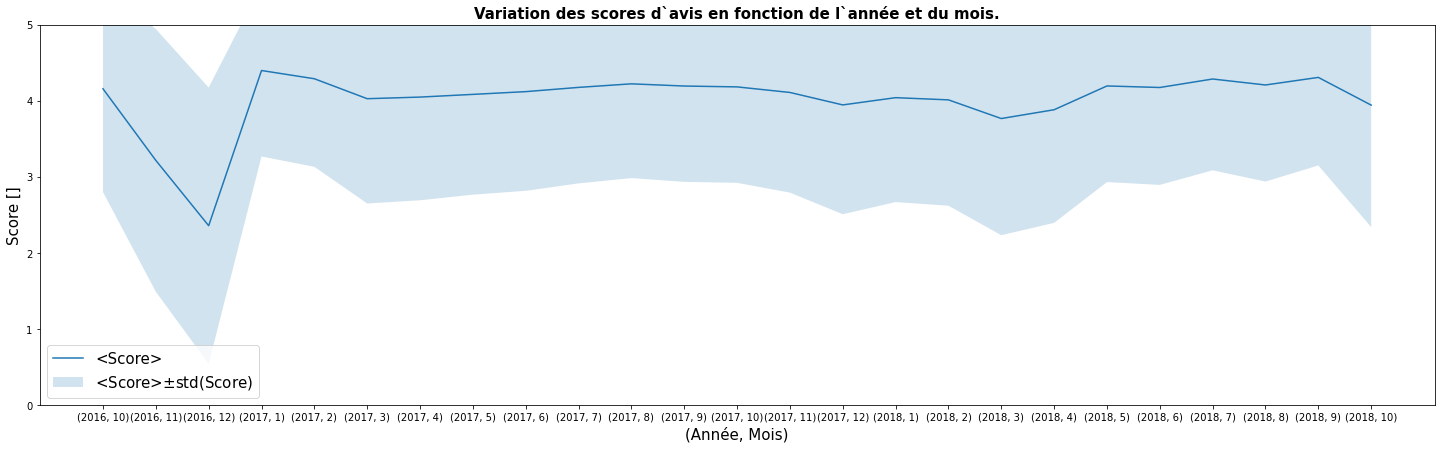

In [51]:
### création de dataframes contenant score et date (année, mois), sous un format facilitant le travail graphique à venir
df_score_date = pd.DataFrame(
    np.array(
        [
            list(df["review_score"].values),
            list(df["review_answer_timestamp"].dt.year.values),
            list(df["review_answer_timestamp"].dt.month.values),
        ]
    ).T,
    index=df.index,
    columns=["score", "Y", "M"],
)
df_grpby = df_score_date.groupby(["Y", "M"]).describe()["score"]
### Représentation graphique
plt.figure("luqeugf", figsize=(25, 7)), plt.clf()
axe = plt.subplot(1, 1, 1)
axe.set_title(
    "Variation des scores d`avis en fonction de l`année et du mois.",
    fontdict={"fontsize": 15, "fontweight": "bold"},
), axe.set_ylabel("Score []", fontsize=15), axe.set_xlabel("(Année, Mois)", fontsize=15)
axe.set_xticks(ticks=range(len(df_grpby))), axe.set_xticklabels(
    labels=df_grpby.index.values
), axe.set_ylim([0, 5])
axe.fill_between(
    x=range(len(df_grpby)),
    y1=df_grpby["mean"] + df_grpby["std"],
    y2=df_grpby["mean"] + -df_grpby["std"],
    alpha=0.2,
    label=r"<Score>$\pm$std(Score)",
), axe.plot(list(df_grpby["mean"].values), label="<Score>")
axe.legend(loc="best", fontsize=15)
if sauvegarde_figure:
    plt.savefig(abs_path_fig + "7_note_avis_f_score.png")

### Pas de variation notable des notations avec le temps, si ce n'est sur les deux derniers mois en 2016. Et encore, ce n'est pas significatif du fait du faible nombre d'éléments correspondants (cf le paramètre <i>count</i> ci-dessous, avec 160 éléments pour ces deux mois sur près de 100 000 pour toute la B2D) :

In [52]:
df_grpby.loc[(2016)]

,count,mean,std,min,25%,50%,75%,max
M,,,,,,,,
10,151.0,4.158940,1.356922,1.0,4.0,5.0,5.0,5.0
11,110.0,3.218182,1.726118,1.0,1.0,4.0,5.0,5.0
12,50.0,2.360000,1.815579,1.0,1.0,1.0,5.0,5.0


In [53]:
del df_score_date, df_grpby, indx_h_non0, nb_respect_relation, ind_nan_mes, ind_nan_tit

### <u><b> Lien entre le <i>review score</i> et la longueur des message :</b></u>
### On a montré qu'il y avait une sur-représentation des mauvaises notes pour les éléments présentant un message d'avis, mais que les bonnes notes restent majoriatires. On se pose alors la question de savoir si la <i>longueur</i> du message d'avis peut être encore plus corrélée à la hauteur de la note.
### On va pour ça  créer 4 nouvelles colonnes : 
### - deux colonnes contenant la longueur de la chaîne de caractère des titres et messages d'avis (la longueur 0 signifiant l'absence de titre/message depuis notre imputation précédente), 
### - et deux contenant un booléen prenant 1 si il y a présence d'un titre/d'un message. 
### On fera ensuite appraître une matrice de corrélation pour juger qui, de la présence ou de la longueur d'un titre/message d'avis, est le meilleur observable pour avoir une idée de la hauteur de la note attrribuée dans <i>review_score</i>.

In [54]:
### longueur des chaîne de caractères
df["lenght_comment_message"] = [
    len(element) for element in df["review_comment_message"]
]
df["lenght_comment_title"] = [len(element) for element in df["review_comment_title"]]
### Booléens de présence d'une chaîne de caractère non nulle
df["presence_comment_message"] = [
    1 if len(element) > 0 else 0 for element in df["review_comment_message"]
]
df["presence_comment_title"] = [
    1 if len(element) > 0 else 0 for element in df["review_comment_title"]
]
### Affichage
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,lenght_comment_message,lenght_comment_title,presence_comment_message,presence_comment_title
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18,2018-01-18 21:46:59,0,0,0,0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,2018-03-10,2018-03-11 03:05:13,0,0,0,0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2018-02-17,2018-02-18 14:36:24,0,0,0,0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,37,0,1,0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,100,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,,,2018-07-07,2018-07-14 17:18:30,0,0,0,0
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,,,2017-12-09,2017-12-11 20:06:42,0,0,0,0
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43,67,0,1,0
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,,,2018-07-01,2018-07-02 12:59:13,0,0,0,0


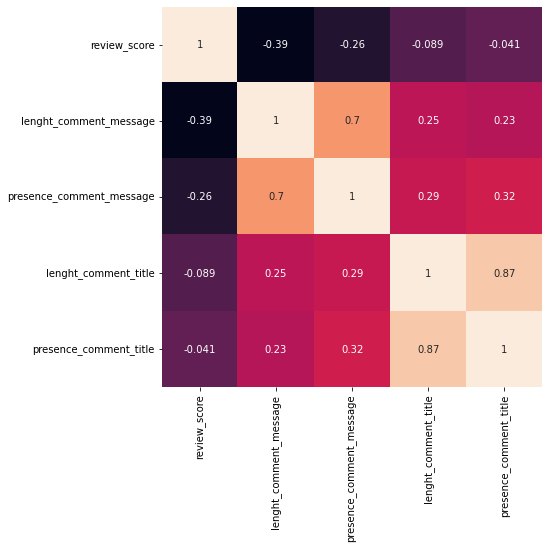

In [55]:
plt.figure(
    "Matrice correlation : score vs pressenc avis vs longueur avis", figsize=(15, 7)
), plt.clf()
axe = plt.subplot(1, 1, 1)
sns.heatmap(
    df[df.columns[[2, -4, -2, -3, -1]]].corr(),
    ax=axe,
    cbar=False,
    square=True,
    annot=True,
)
if sauvegarde_figure:
    plt.savefig(abs_path_fig + "8_matrice_corr_score_f_presence_avis.png")
del axe

### C'est assez net : la longueur du message est nettement plus "négativament corrélée" que la présence du message. Celà signifie que la longueur de la chaîne de caractère du message d'avis est un meilleur observable quant à la hauteur de la notation que la présence d'un message d'avis.
(quant aux titres, les deux corrélations avec le score sont quasi-nulle, ce à quoi on devait s'attendre puisqu'on avait montrait que la présence ou absence de titre conduisait quasiment aux mêmes pourcentages de hateur de notation que pour l'ensemble des éléments).

In [56]:
df.groupby("review_score")["lenght_comment_message"].describe(
    percentiles=np.arange(0.1, 1, 0.1)
)

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
review_score,,,,,,,,,,,,,,
1,11424.0,76.504902,67.393402,0.0,0.0,0.0,25.0,44.0,63.0,84.0,111.0,147.0,190.0,208.0
2,3151.0,65.926373,66.261533,0.0,0.0,0.0,0.0,29.0,47.0,72.0,98.0,131.0,180.0,203.0
3,8179.0,36.240494,56.481488,0.0,0.0,0.0,0.0,0.0,0.0,12.0,44.0,77.0,130.0,204.0
4,19142.0,19.272803,40.542696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,33.0,71.0,207.0
5,57328.0,18.586188,35.040532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,38.0,65.0,204.0


### Les moyennes de longueur de message par note, ainsi que les déciles des distributions correspondantes, sont également sensiblement différentes selon que la note est bonne ou mauvaise.
### !!!! <u>CHOIX FORT :</u> On décide donc d'inclure de façon pérenne la longueur des messages d'avis dans cette base de donnée !!!

In [57]:
b2d_tab["olist_order_reviews_dataset"]["review_lenght_comment_message"] = df[
    "lenght_comment_message"
]
# Affichage
b2d_tab["olist_order_reviews_dataset"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_lenght_comment_message
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18,2018-01-18 21:46:59,0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,2018-03-10,2018-03-11 03:05:13,0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2018-02-17,2018-02-18 14:36:24,0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,37
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,100
...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,,,2018-07-07,2018-07-14 17:18:30,0
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,,,2017-12-09,2017-12-11 20:06:42,0
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43,67
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,,,2018-07-01,2018-07-02 12:59:13,0


## 
## <b><u>III.6) Analyse de : <i>olist_orders_dataset</i>.</u></b>

In [58]:
# Création d'une varibale locale pour faciliter notre travail, qui est une copie de la B2D "olist_orders_dataset"
df = b2d_tab["olist_orders_dataset"].copy(deep=True)
# Affichage de qlqs lignes pour se faire une idée des infos qu'elle contient :
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


### 
### <b><u>III.6.a) Analyse sommaire, et unicités.</u></b>
### Cette B2D contient des informations faisant le lien entre les clients et les commandes, au travers d'informations pratiques sur les commandes (étape courante dans le processus d'achat-livraison, dates correspondates, etc).

In [59]:
for col in df.columns:
    print(
        f"Pour la variable {col : >30}, il y a {df[col].unique().shape[0] : 7.0f} valeurs possibles pour {df.shape[0]} éléments dans la B2D."
    )
# On efface les variables devenues inutiles
del col

Pour la variable                       order_id, il y a   99441 valeurs possibles pour 99441 éléments dans la B2D.
Pour la variable                    customer_id, il y a   99441 valeurs possibles pour 99441 éléments dans la B2D.
Pour la variable                   order_status, il y a       8 valeurs possibles pour 99441 éléments dans la B2D.
Pour la variable       order_purchase_timestamp, il y a   98875 valeurs possibles pour 99441 éléments dans la B2D.
Pour la variable              order_approved_at, il y a   90734 valeurs possibles pour 99441 éléments dans la B2D.
Pour la variable   order_delivered_carrier_date, il y a   81019 valeurs possibles pour 99441 éléments dans la B2D.
Pour la variable  order_delivered_customer_date, il y a   95665 valeurs possibles pour 99441 éléments dans la B2D.
Pour la variable  order_estimated_delivery_date, il y a     459 valeurs possibles pour 99441 éléments dans la B2D.


### Unicité totale pour les paramètres (qui sont des identifiants) <i>order_id</i> et <i>customer_id</i>. Au contraire, peu de valeurs uniques différentes pour <i>order_status</i> (ce qui n'est pas surprenant, car c'est un paramètre catégoriel) et <i>order_estimated_delivery_date</i> (ce qui est plus surprenant en regard du grand nombre de valeurs uniques différentes pour les autres dates).
#### 
#### <b><u>Valeurs uniques de <i>customer_id</i> communes avec d'autres B2D ?</u></b>
### On compte le nomnbre valeurs uniques de la colonne <i>customer_id</i> qui sont communes à sa colonne homonyme de la toute première B2D <i>olist_customers_dataset</i> :

In [60]:
for b2d in ["olist_customers_dataset"]:
    nb_communes = np.intersect1d(
        df["customer_id"].unique(),
        b2d_tab[b2d]["customer_id"].unique(),
        assume_unique=True,
    ).shape[0]
    print(
        f"Le paramètre customer_id de cette B2D a {nb_communes} valeurs unique communes avec la B2D {b2d}."
    )
del b2d, nb_communes

Le paramètre customer_id de cette B2D a 99441 valeurs unique communes avec la B2D olist_customers_dataset.


### Yes ! Intersection totale ! Toutes les valeurs sont communes (on pouvait s'en douter vu que les deux B2D présentent le même nombre de valeurs uniques pour ce paramètre).
#### 
#### <b><u>Valeurs uniques de <i>order_id</i> communes avec d'autres B2D ?</u></b>
### Comme en sections III.4.a et III.5.a, on regarde combien de valeurs uniques de la colonne <i>order_id</i> sont communes à sa colonne homonyme des B2D précédentes <i>olist_order_items_dataset</i>, <i>olist_order_payments_dataset</i> et <i>olist_order_reviews_dataset</i> :

In [61]:
for b2d in [
    "olist_order_items_dataset",
    "olist_order_payments_dataset",
    "olist_order_reviews_dataset",
]:
    nb_communes = np.intersect1d(
        df["order_id"].unique(), b2d_tab[b2d]["order_id"].unique(), assume_unique=True
    ).shape[0]
    print(
        f"Le paramètre order_id de cette B2D a {nb_communes} valeurs unique communes avec la B2D {b2d}."
    )
del b2d, nb_communes

Le paramètre order_id de cette B2D a 98666 valeurs unique communes avec la B2D olist_order_items_dataset.
Le paramètre order_id de cette B2D a 99437 valeurs unique communes avec la B2D olist_order_payments_dataset.
Le paramètre order_id de cette B2D a 98673 valeurs unique communes avec la B2D olist_order_reviews_dataset.


### Quasiment toutes sont communes, c'est rassurant.
### Toujours pas d'éléments "dupliqués" redondants, pas plus que dans les B2D précédentes :

In [62]:
df.duplicated().sum()

0

### 
### <b><u>III.6.b) Analyse des NaN.</u></b>

In [63]:
# Calcul du nombre de NaN par colonne :
df.isna().sum(axis=0)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [64]:
nb_lignes_nan = (
    df.shape[0]
    - df[[col for col in df.columns if df[col].isna().sum() > 0]]
    .dropna(axis=0, how="any")
    .shape[0]
)
print(
    "Nombre de lignes contenant au moins une NaN = ",
    nb_lignes_nan,
    f", soit{100*nb_lignes_nan/df.shape[0] : 3.1f}% des lignes de cette B2D.",
)
del nb_lignes_nan

Nombre de lignes contenant au moins une NaN =  2980 , soit 3.0% des lignes de cette B2D.


### Ce serait un taux de pertes acceptable si on décidait de supprimer ces lignes par facilité. Néanmoins, puisque ces paramètres concernent des dates, regardons s'il n'existent pas des relations entre elles permettant de faire une imputation de valeurs "prudente et sous contrôle". 
#### 
#### <b><u> Relations entre les dates :</u></b>
### Puisqu'il s'agit de dates, convertissons les en objet <i>Datetime</i> directement dans la B2D :

In [65]:
# transformations effectives directement au sein de la B2D
for col in df.columns[3:]:
    b2d_tab["olist_orders_dataset"][col] = pd.to_datetime(df[col])
# reactualisation de la copie de la B2D
df = b2d_tab["olist_orders_dataset"].copy(deep=True)
# on effeca la variable inutile désormais
del col
# affichage des dtypes de ces 2 colonnes
df[df.columns[3:]].dtypes

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

### Pour exumer des relations (éventuelles) entre dates, autant le faire sur toutes les dates d'un seul coup : concentrons nous donc sur la portion majoritaire des éléments de la B2D dépourvus de NaN :

In [66]:
# Calcul de la B2D sans la moindre NaN
df_ss_nan = df[df.columns[3:]].copy(deep=True).dropna(axis=0, how="any")
# Affichage
df_ss_nan

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...
99436,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [67]:
for col1, col2 in zip(df_ss_nan.columns[:-1], df_ss_nan.columns[1:]):
    prct_respect = 100 * (df_ss_nan[col1] <= df_ss_nan[col2]).sum() / df_ss_nan.shape[0]
    print(
        f"Il y a {prct_respect : >5.1f}% des éléments de cette B2D réduite respectent la relation temporelle{col1 : >30} <= {col2 : <30}"
    )
del col1, col2, prct_respect

Il y a 100.0% des éléments de cette B2D réduite respectent la relation temporelle      order_purchase_timestamp <= order_approved_at             
Il y a  98.6% des éléments de cette B2D réduite respectent la relation temporelle             order_approved_at <= order_delivered_carrier_date  
Il y a 100.0% des éléments de cette B2D réduite respectent la relation temporelle  order_delivered_carrier_date <= order_delivered_customer_date 
Il y a  91.9% des éléments de cette B2D réduite respectent la relation temporelle order_delivered_customer_date <= order_estimated_delivery_date 


### Ces relations sont quasiment toujours vérifiées (ce qui est logique en regard de ce que signifient ces dates, en terme d'étapes dans le processus entre l'achat et la livarison).
### Par ailleurs, les quelques milliers d'éléments pour lesquelles ces relations ne sont pas vérifiées ne signifient pas qu'il y a nécessairement une erreur, en particulier quand order_delivered_customer_date > order_estimated_delivery_date (il peut y avoir des raisons physiques au retard de livraison, et on a d'ailleurs intérêt à garder préciseusement ces éléments, car ils contiennent probabablement des infos sur l'insatisfaction des clients correspondants).

#### 
#### <b><u>Realtions entre dates et statuts :</u></b>
### Est-ce que les NaN des <i>order_delivered_</i> correspondent à d'autres status que <i>delivered</i> de <i>order_status</i> ? Vérifions le :

In [68]:
### On crée une nouvelle varibale égale à la B2D mais réduite aux éléments qui contiennent des NaN
df_order_nan = (
    df[df.columns[2:]]
    .where(
        np.logical_or(
            df["order_approved_at"].isna(),
            np.logical_or(
                df["order_delivered_carrier_date"].isna(),
                df["order_delivered_customer_date"].isna(),
            ),
        )
    )
    .dropna(axis=0, how="all")
    .copy(deep=True)
)
# Affichage
df_order_nan

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...
99283,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


### Il semblerait qu'on ait vu juste, mais vérifions de façon systématique. Calculons, pour chaque statut de commande [catégories possibles pour la colonne <i>order_status</i>], son pourcentage de nombre d'apparition qui ne concernent que des lignes pourvues de NaN :

In [69]:
print(
    "Statut de la commande, % du nombre d`apparitions parmis les éléments contenant des NaN :"
)
[
    (
        key,
        100
        * df_order_nan["order_status"].value_counts()[key]
        / df["order_status"].value_counts()[key],
    )
    for key in df["order_status"].value_counts().keys()
]

Statut de la commande, % du nombre d`apparitions parmis les éléments contenant des NaN :


[('delivered', 0.023839631833164038),
 ('shipped', 100.0),
 ('canceled', 99.04),
 ('unavailable', 100.0),
 ('invoiced', 100.0),
 ('processing', 100.0),
 ('created', 100.0),
 ('approved', 100.0)]

### En effet, <i>delivered</i> ne concerne quasiment que les éléments dépourvus de NaN (ce qui signifie potentiellement que 0.02% des éléments prenant ce statut sont mal renseignés). Au contraire, tous les autres statuts ne concernent EXCLUSIVEMENT QUE les éléments prenant une NaN en <i>order_delivered_carrier_date</i> ou <i>order_delivered_customer_date</i> (sauf pour <i>canceled</i> pour qui s'est PRESQUE le cas, à 99% des éléments correspondants).
### Autrement dit : ces NaN peuvent avoir du sens, et on perdrait de l'information en supprimant telles quelles les lignes correspondantes... 

### 
### <b><u>III.6.c) Suppression de certaines lignes.</u></b>
#### <b><u>Les statuts les moins remplis :</u></b>

In [70]:
df["order_status"].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

### Autant supprimer les lignes correspondant à ces 2 dernières catégories si peu remplies. Elles ne feraient que compliquer l'apprentissage.

In [71]:
# calcul des indices correspondant
indx_cat_peu_remplies = df[
    np.logical_or(df["order_status"] == "created", df["order_status"] == "approved")
].index
# suppression effective directement au sein de la B2D
b2d_tab["olist_orders_dataset"].drop(index=indx_cat_peu_remplies, inplace=True)

In [72]:
del indx_cat_peu_remplies, df_order_nan, df_ss_nan

## 
## <b><u>III.7) Analyse de : <i>olist_products_dataset</i>.</u></b>

In [73]:
# Création d'une varibale locale pour faciliter notre travail, qui est une copie de la B2D "olist_products_dataset"
df = b2d_tab["olist_products_dataset"].copy(deep=True)
# Affichage de qlqs lignes pour se faire une idée des infos qu'elle contient :
df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


### 
### <b><u>III.7.a) Analyse sommaire, et unicités.</u></b>
### Cette B2D contient des informations concernant les produits (catégories, dimensions, nombre de photos mises en lignes).

In [74]:
for col in df.columns:
    print(
        f"Pour la variable {col : >30}, il y a {df[col].unique().shape[0] : 7.0f} valeurs possibles pour {df.shape[0]} éléments dans la B2D."
    )
# On efface les variables devenues inutiles
del col

Pour la variable                     product_id, il y a   32951 valeurs possibles pour 32951 éléments dans la B2D.
Pour la variable          product_category_name, il y a      74 valeurs possibles pour 32951 éléments dans la B2D.
Pour la variable            product_name_lenght, il y a      67 valeurs possibles pour 32951 éléments dans la B2D.
Pour la variable     product_description_lenght, il y a    2961 valeurs possibles pour 32951 éléments dans la B2D.
Pour la variable             product_photos_qty, il y a      20 valeurs possibles pour 32951 éléments dans la B2D.
Pour la variable               product_weight_g, il y a    2205 valeurs possibles pour 32951 éléments dans la B2D.
Pour la variable              product_length_cm, il y a     100 valeurs possibles pour 32951 éléments dans la B2D.
Pour la variable              product_height_cm, il y a     103 valeurs possibles pour 32951 éléments dans la B2D.
Pour la variable               product_width_cm, il y a      96 valeurs possible

### Seul l'identifiant <i>product_id</i> est à 100% d'unicité, c'est loin d'être le cas pour les autres paramètres (ce qui n'est pas vraiment surprenant vu la nature de ces paramètres, qui laisse de la place à de nombreuses valeurs multiples).
#### 
#### <b><u>Valeurs uniques de <i>product_id</i> communes avec d'autres B2D ?</u></b>
### On compte le nombre valeurs uniques de la colonne <i>product_id</i> qui sont communes à sa colonne homonyme de la B2D <i>olist_order_items_dataset</i> :

In [75]:
for b2d in ["olist_order_items_dataset"]:
    nb_communes = np.intersect1d(
        df["product_id"].unique(),
        b2d_tab[b2d]["product_id"].unique(),
        assume_unique=True,
    ).shape[0]
    print(
        f"Le paramètre product_id de cette B2D a {nb_communes} valeurs unique communes avec la B2D {b2d}."
    )
del b2d, nb_communes

Le paramètre product_id de cette B2D a 32951 valeurs unique communes avec la B2D olist_order_items_dataset.


### Parfait, ce sont exactement les mêmes identifiants de produit d'une B2D à l'autre.
### Pas besoin de chercher les lignes redondantes puisqu'il n'y en a pas, <i>product_id</i> étant à 100% composé de valeurs uniques.

### 
### <b><u>III.7.b) Analyse des NaN.</u></b>

In [76]:
# Calcul du nombre de NaN par colonne :
df.isna().sum(axis=0)

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

### Il y en a, et d'ailleurs, impossible de ne pas se demander si les NaN ne sont pas toutes aux mêmes indices, du fait du même nombre de NaN par groupe de colonnes :

In [77]:
for col1, col2 in zip(df.columns[1:4], df.columns[2:5]):
    print(
        f"Il y a {100*len(np.intersect1d(df[df[col1].isna()].index, df[df[col2].isna()].index))/len(df[df[col1].isna()].index) : 4.1f}% des éléments de {col1 : >26} qui sont des NaN simultanément aux éléments de {col2}"
    )

Il y a  100.0% des éléments de      product_category_name qui sont des NaN simultanément aux éléments de product_name_lenght
Il y a  100.0% des éléments de        product_name_lenght qui sont des NaN simultanément aux éléments de product_description_lenght
Il y a  100.0% des éléments de product_description_lenght qui sont des NaN simultanément aux éléments de product_photos_qty


In [78]:
for col1, col2 in zip(df.columns[5:8], df.columns[6:]):
    print(
        f"Il y a {100*len(np.intersect1d(df[df[col1].isna()].index, df[df[col2].isna()].index))/len(df[df[col1].isna()].index) : 4.1f}% des éléments de {col1 : >26} qui sont des NaN simultanément aux éléments de {col2}"
    )

Il y a  100.0% des éléments de           product_weight_g qui sont des NaN simultanément aux éléments de product_length_cm
Il y a  100.0% des éléments de          product_length_cm qui sont des NaN simultanément aux éléments de product_height_cm
Il y a  100.0% des éléments de          product_height_cm qui sont des NaN simultanément aux éléments de product_width_cm


### Bingo. En revanche, on hésite à supprimer ces NaN. Bien que ces 612 lignes représente seulement ~ 2% des éléments de cette B2D, il faut se rappeler que même de si faibles pourcentage comptent pour un ensemble de B2D où seuls 3% des ~ 96000 clients solicitent plus d'une fois les services de ce site. 
#### 
#### <b><u>Imputation :</u></b>
### Une solution "simple" est de remplacer les NaN par :
#### - '' si la colonne est composée par ailleurs de chaînes de caractères ;
#### - 0 si la colonne est composée par ailleurs de chiffres (d'autant qu'en l'occurence, ces colonnes ci concernent 2 fois sur 3 des longueurs... de chaînes de caractère).

In [79]:
del col1, col2
for col in df.columns[1:5]:
    # recherche des indices correspondant aux NaN :
    indx = df[df[col].isna()].index
    # remplacement effectif directement dans la B2D
    b2d_tab["olist_products_dataset"].loc[indx, col] = (
        "" if col == "product_category_name" else 0
    )
del col
# reactualisation de la variable copie de la B2D
df = b2d_tab["olist_products_dataset"].copy(deep=True)
# Affichage de qlqs lignes pour se faire une idée des infos qu'elle contient :
df.loc[indx]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,,0.0,0.0,0.0,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,,0.0,0.0,0.0,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,,0.0,0.0,0.0,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,,0.0,0.0,0.0,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,,0.0,0.0,0.0,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,,0.0,0.0,0.0,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,,0.0,0.0,0.0,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,,0.0,0.0,0.0,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,,0.0,0.0,0.0,1300.0,45.0,16.0,45.0


#### 
#### <b><u>Suppression de lignes :</u></b>
### Enfin, on peut plus simplement supprimer les 2 lignes pour lesquelles les dimensions des objets ne sont pas précisées :

In [80]:
# recherche des indices correspondant aux NaN :
indx = df[df["product_weight_g"].isna()].index
# remplacement effectif directement dans la B2D
b2d_tab["olist_products_dataset"].drop(index=indx, inplace=True)
del indx

### 
### <b><u>III.7.c) Analyse mono-variées.</u></b>

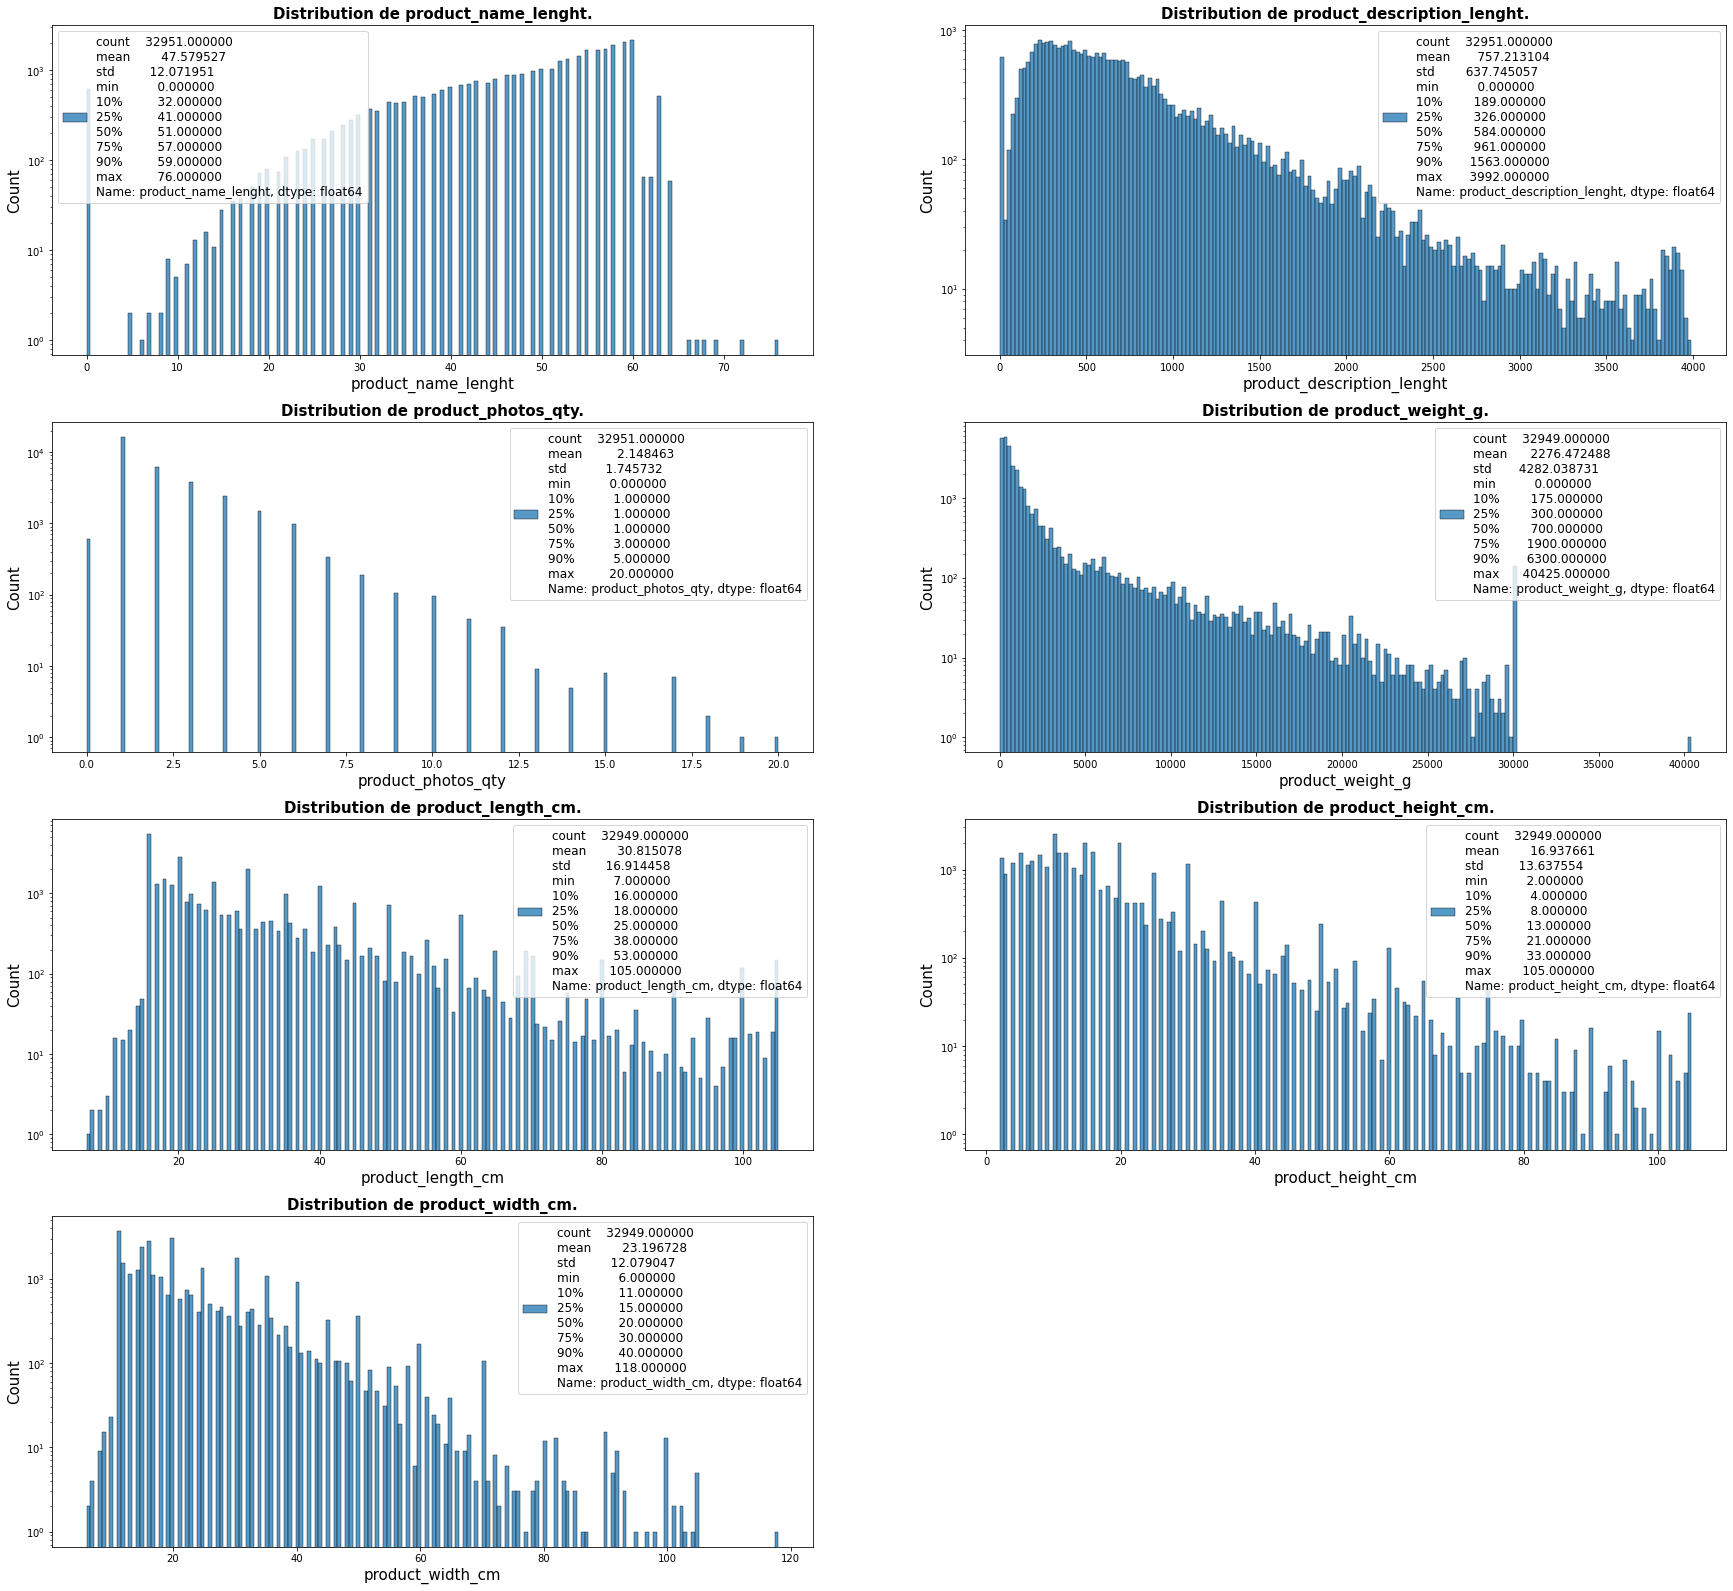

In [81]:
plt.figure(
    "Distributions mono-variées olist_products_dataset", figsize=(15 * 2, 7 * 4)
), plt.clf()
for col, i in zip(df.columns[2:], range(1, df.shape[1])):
    axe, data = plt.subplot(4, 2, i), df[col]
    axe.set_title(
        f"Distribution de {col}.", fontdict={"fontsize": 15, "fontweight": "bold"}
    ), axe.set_ylabel(axe.get_ylabel(), fontsize=15), axe.set_xlabel(
        f"{col}", fontsize=15
    )
    axe.set_yscale("log")
    sns.histplot(
        data=data, ax=axe, bins="sqrt", label=data.describe([0.1, 0.25, 0.5, 0.75, 0.9])
    ), axe.legend(loc="best", fontsize=12)
del axe, data, col, i

### Une seule remarque à faire (outre le fait que les 0 qu'on a imputés se voient particulièrement bien, et qu'il faurda faire attention aux effets qu'ils produiront dans les algorithmes) : on voit un seul <i>outlier</i> net pour deux distributions qui <i>_weight</i> et <i>_width</i> concernent les dimensions des produits (pour <i>_name</i> il n'y a rien d'étonnant à ceux que quelques noms contiennent beaucoup plus de lettres).
### Affichons tout d'abord les dimensions complètes de ces deux outliers

In [82]:
df.loc[df["product_weight_g"].argmax(), df.columns[5:]], df.loc[
    df["product_width_cm"].argmax(), df.columns[5:]
]

(product_weight_g     40425
 product_length_cm       13
 product_height_cm       65
 product_width_cm        28
 Name: 25166, dtype: object,
 product_weight_g     1050
 product_length_cm      23
 product_height_cm      93
 product_width_cm      118
 Name: 26970, dtype: object)

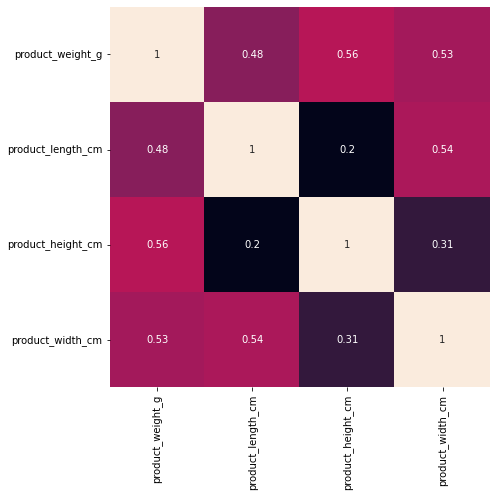

In [83]:
plt.figure("Matrice correlation distrib dimension et poids", figsize=(15, 7)), plt.clf()
axe = plt.subplot(1, 1, 1)
sns.heatmap(df[df.columns[5:]].corr(), ax=axe, cbar=False, square=True, annot=True)
if sauvegarde_figure:
    plt.savefig(abs_path_fig + "9_matrice_corr_product_dim.png")
del axe

### Un peu étonnant qu'avec des coefficients de corrélation linéaire relativement haut, les poids de ces outliers ne correspondent pas à des dimensions plus en rapport avec leur positions respectives au sein de leurs distributions : on supprime ces deux outliers par précaution.

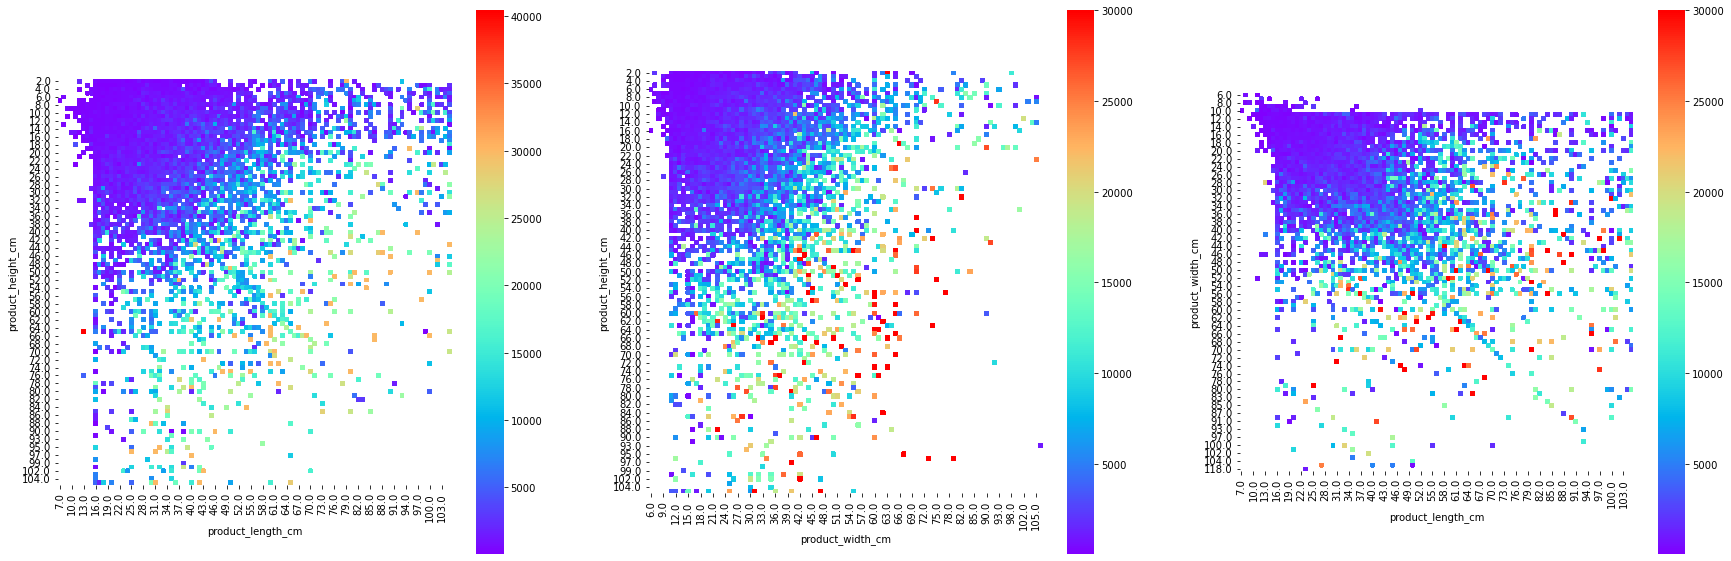

In [84]:
plt.figure("Matrice poids = f(dimensions)", figsize=(30, 10)), plt.clf()
for i, (coly, colx) in enumerate(
    zip(
        ["product_height_cm", "product_height_cm", "product_width_cm"],
        ["product_length_cm", "product_width_cm", "product_length_cm"],
    )
):
    axe = plt.subplot(1, 3, i + 1)
    sns.heatmap(
        df[[coly, colx, "product_weight_g"]].pivot_table(
            index=coly, columns=colx, values="product_weight_g"
        ),
        ax=axe,
        square=True,
        cmap="rainbow",
    )
if sauvegarde_figure:
    plt.savefig(abs_path_fig + "10_matrice_poids_f_dimensions_product.png")
del i, coly, colx, axe

### D'ailleurs, les graphes ci-dessous (poids en fonction de deux dimensions du produits parmis les trois possibles) tendent à abonder dans l'idée que le poids augmente quand les deux dimensions augmentent, particulièrement si elles augmentent simultanément. Notre décision par rapport aux deux outliers est la suivante : on supprime ces deux outliers par précaution.
### Notons cependant que ce n'est pas un choix dépourvu de risque, car basé sur pas mal d'exptrapolation de notre part (peu de produits possédant simulatnément plusieurs 'grandes" dimensions).

In [85]:
for col in ["product_weight_g", "product_width_cm"]:
    # recherche des indices correspondant aux NaN :
    indx = df[col].argmax()
    # remplacement effectif directement dans la B2D
    b2d_tab["olist_products_dataset"].drop(index=indx, inplace=True)
del col, indx

## 
## <b><u>III.8) Analyse de : <i>olist_sellers_dataset</i>.</u></b>

In [86]:
# Création d'une varibale locale pour faciliter notre travail, qui est une copie de la B2D "olist_products_dataset"
df = b2d_tab["olist_sellers_dataset"].copy(deep=True)
# Affichage de qlqs lignes pour se faire une idée des infos qu'elle contient :
df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


### Pour l'instant, cette B2D à propos des vendeur ne nous intéresse pas, car notre attention se porte sur les clients (<i>custommer</i>)

## 
## <b><u>III.9) Analyse de : <i>product_category_name_translation</i>.</u></b>

In [87]:
# Création d'une variable locale pour faciliter notre travail, qui est une copie de la B2D "olist_products_dataset"
df = b2d_tab["product_category_name_translation"].copy(deep=True)
# Affichage de qlqs lignes pour se faire une idée des infos qu'elle contient :
df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [88]:
for col in df.columns:
    print(
        f"Pour la variable {col : >30}, il y a {df[col].unique().shape[0] : 7.0f} valeurs possibles pour {df.shape[0]} éléments dans la B2D."
    )
# On efface les variables devenues inutiles
del col

Pour la variable          product_category_name, il y a      71 valeurs possibles pour 71 éléments dans la B2D.
Pour la variable  product_category_name_english, il y a      71 valeurs possibles pour 71 éléments dans la B2D.


### Conclusion : Cette B2D nous servira uniquement pour traduire en annglais les catégories de produits. On fabrique à ce titre une fonction qu'on utilisera plus tard pour faire une telle traduction.

In [89]:
def traduction(Serie_port=pd.Series(data=[""])):
    """
    entrée Serie_port : la série à traduire du portugais vers l'anglais (dans les faits, il s'agira de b2d_tab['olist_products_dataset']['product_category_name'])
    variable dico : "dictionnaire" de traduction (également au sens python du terme), basé sur les colonnes de b2d_tab['product_category_name_translation']
    sortie Serie_trad : liste contenant la traduction des valeurs de Serie_port, aux mêmes indices, reyournée sous forme de pandas.Series"""
    dico = {
        clef: val
        for clef, val in zip(
            b2d_tab["product_category_name_translation"][
                "product_category_name"
            ].unique(),
            b2d_tab["product_category_name_translation"][
                "product_category_name_english"
            ].unique(),
        )
    }
    Serie_trad = [
        dico[Serie_port.loc[indx]]
        if Serie_port.loc[indx] in dico.keys()
        else Serie_port.loc[indx]
        for indx in Serie_port.index
    ]
    return pd.Series(data=Serie_trad, index=Serie_port.index, name=Serie_port.name)

In [90]:
### On la met à l'essai
traduction(b2d_tab["olist_products_dataset"]["product_category_name"])

0                        perfumery
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name, Length: 32947, dtype: object

### Essai concluant.

# 
# <u><b>IV) Création de la B2D de travail.</b></u>
### On va créer notre B2D de travail à partir de la fusion de plusieurs des B2D précédentes. En effet, ce sera plus simple de travailler sur une seule, plutôt que de faire des référence de l'une à l'autre.

In [91]:
# On commence par effacer la dernière copie d'une des 9 B2D qui existe encore, car elle ne nous sert plus à rien désormais
del df

# 
## <u><b>IV.1) Création de la B2D de travail adaptée à la segmentation RFM.</b></u>
### Une telle segmentation est basée sur 3 type de <i>features</i> :
#### - la récence [<i>i.e.</i> l'ancienneté de la dernière commande par client] ;
#### - la fréquence de commande ;
#### - le montant par client (soit de la dernière commande, soit sur une période donnée).
### Pour construire de telles <i>features</i>, qui pour deux d'entre elles ne sont pas explicitement présentes dans les jeux de données à notre disposition, on doit donc s'appuyer indispensablement sur les B2D suivantes :
#### - <i>olist_customers_dataset</i>, qui contient les identifiants des clients ;
#### - <i>olist_orders_dataset</i>, qui contient toutes les dates enregistrées des différentes étapes du processus de commande-achat-livraison, par commande et par client ;
#### - <i>olist_order_payments_dataset</i>, qui contient toutes les informations sur les paiements de chaque commande (dont le montant...).
### On pourrait éventuellement rajouter <i>olist_order_items_dataset</i> qui permettrait d'avoir accès au prix et frais de port de chaque commande, soit une information complémentaire à celle du montant. Cependant, on s'en passera pour l'instant afin de tester une version simple, voir minimaliste, de segmentation RFM (au pire, on pourra toujours rajouter ces informations à notre jeu de données a posteriori).

### 
### <b><u>IV.1.a) Aggrégation/fusion des différentes B2D.</u></b>
### On commence par créer différentes copies de nos B2D afin de ne pas risquer une fausse manoeuvre qui corromperait les B2D initiales. C'est à partir de ces copies que l'on va engendrer la B2D unique, surlaquelle on fera ensuite d'éventuelles dernières opérations de contrôle/mise en forme/réduction de dimension/etc avant de la sauvegarder.

In [92]:
# copies avec deep=True pour protéger les infos initiales.
df_cus, df_ord, df_pay = (
    b2d_tab["olist_customers_dataset"].copy(deep=True),
    b2d_tab["olist_orders_dataset"].copy(deep=True),
    b2d_tab["olist_order_payments_dataset"].copy(deep=True),
)

### On fusionne ensuite les deux premières, à patrir de leur paramètre commun : <i>customer_id</i>.

In [93]:
df_union_rfm = df_cus.merge(df_ord, on="customer_id")
# Affichage
df_union_rfm

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99429,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99430,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99431,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99432,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


### Le nombre de lignes nous informe que c'est la B2D la moins fournie en <i>customer_id</i> qui a imposé ses éléments dans la fusion. Il nous faut donc vérifier à quel point l'unicité du paramètre indispensable <i>customer_unique_id</i> a pû être présevée :

In [94]:
param = "customer_unique_id"
print(
    f"Nbr de valeurs uniques du paramètre {param} pour\n\t- df_union_rfm :{df_union_rfm[param].unique().shape[0]},\n\t- df_cus :{df_cus[param].unique().shape[0]}."
)
print(
    f"Pourcentage de valeurs unique du paramètre {param} présents > 1 fois pour\n\t- df_union_rfm :{100*df_union_rfm[param].value_counts()[df_union_rfm[param].value_counts()>=2].shape[0]/df_union_rfm[param].unique().shape[0] : .2f}%,\n\t- df_cus :{100*df_cus[param].value_counts()[df_cus[param].value_counts()>=2].shape[0]/df_cus[param].unique().shape[0] : .2f}%."
)
del param

Nbr de valeurs uniques du paramètre customer_unique_id pour
	- df_union_rfm :96090,
	- df_cus :96096.
Pourcentage de valeurs unique du paramètre customer_unique_id présents > 1 fois pour
	- df_union_rfm : 3.12%,
	- df_cus : 3.12%.


### Les pertes sont donc à la marge, on valide !
### Passons donc à la deuxième fusion, entre df_RFM et <i>olist_order_payments_dataset</i>. Elle se fera selon le paramètre commun <i>order_id</i> :

In [95]:
df_union_rfm = df_union_rfm.merge(df_pay, on="order_id")
# affichage
df_union_rfm

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,credit_card,8,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103871,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,credit_card,6,88.78
103872,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,credit_card,3,129.06
103873,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,credit_card,5,56.04
103874,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,credit_card,2,711.07


### Même précaution que lors de l'étape précédente concernant l'unicité de <i>customer_unique_id</i> :

In [96]:
param = "customer_unique_id"
print(
    f"Nbr de valeurs uniques du paramètre {param} pour\n\t- df_union_rfm :{df_union_rfm[param].unique().shape[0]},\n\t- df_cus :{df_cus[param].unique().shape[0]}."
)
print(
    f"Pourcentage de valeurs unique du paramètre {param} présents > 1 fois pour \n\t- df_union_rfm :{100*df_union_rfm[param].value_counts()[df_union_rfm[param].value_counts()>=2].shape[0]/df_union_rfm[param].unique().shape[0] : .2f}%,\n\t- df_cus :{100*df_cus[param].value_counts()[df_cus[param].value_counts()>=2].shape[0]/df_cus[param].unique().shape[0] : .2f}%."
)
del param

Nbr de valeurs uniques du paramètre customer_unique_id pour
	- df_union_rfm :96087,
	- df_cus :96096.
Pourcentage de valeurs unique du paramètre customer_unique_id présents > 1 fois pour 
	- df_union_rfm : 5.96%,
	- df_cus : 3.12%.


### C'est presque "meilleur" qu'initialement, puisque l'ajout des commandes a fait gonfler l'importance des consommateurs ayant solicité les services du site web plus d'une fois (ce qui est assez logique, en fin de compte).
### Prenons cependant le temps d'appliquer les mêmes précautions au paramètre <i>order_id</i> :

In [97]:
param = "order_id"
print(
    f"Nbr de valeurs uniques du paramètre {param} pour\n\t- df_union_rfm :{df_union_rfm[param].unique().shape[0]},\n\t- df_ord :{df_ord[param].unique().shape[0]},\n\t- df_pay :{df_pay[param].unique().shape[0]}."
)
print(
    f"Pourcentage de valeurs unique du paramètre {param} présents > 1 fois pour \n\t- df_union_rfm :{100*df_union_rfm[param].value_counts()[df_union_rfm[param].value_counts()>=2].shape[0]/df_union_rfm[param].unique().shape[0] : .2f}%,\n\t- df_ord :{100*df_ord[param].value_counts()[df_ord[param].value_counts()>=2].shape[0]/df_ord[param].unique().shape[0] : .2f}%,\n\t- df_pay :{100*df_pay[param].value_counts()[df_pay[param].value_counts()>=2].shape[0]/df_pay[param].unique().shape[0] : .2f}%."
)
del param

Nbr de valeurs uniques du paramètre order_id pour
	- df_union_rfm :99430,
	- df_ord :99434,
	- df_pay :99437.
Pourcentage de valeurs unique du paramètre order_id présents > 1 fois pour 
	- df_union_rfm : 2.98%,
	- df_ord : 0.00%,
	- df_pay : 2.98%.


### Les pertes de valeurs uniques sont largement acceptables. En revanche, il faudra surveiller le fait que certaines commandes sont présentes plusieurs fois, ce qui peut être problématique.  

In [98]:
del df_pay, df_ord, df_cus

### 
### <b><u>IV.1.b) Analyse de df_RFM.</u></b>
#### <b><u>Recherche d'éléments "dupliqués" redondants, et d'éventuelles NaN.</u></b>

In [99]:
df_union_rfm.duplicated().sum()

0

### Pas de dupliqués. Passons aux NaN

In [100]:
print("Nbr de NaN dans la colonne")
for col in df_union_rfm.columns:
    print(f"\t-{col} : {df_union_rfm[col].isna().sum()}")
del col

Nbr de NaN dans la colonne
	-customer_id : 0
	-customer_unique_id : 0
	-customer_zip_code_prefix : 0
	-customer_city : 0
	-customer_state : 0
	-order_id : 0
	-order_status : 0
	-order_purchase_timestamp : 0
	-order_approved_at : 167
	-order_delivered_carrier_date : 1878
	-order_delivered_customer_date : 3122
	-order_estimated_delivery_date : 0
	-payment_sequential : 0
	-payment_type : 0
	-payment_installments : 0
	-payment_value : 0


### Des NaN seulement pour certaines dates, et qui ont du sens physique (cf nos travaux en section III.4). On n'y touche donc pas.
#### 
#### <b><u>Sort réservé aux colonnes non nécessaires.</u></b>
### Un certains nombre de colonnes ne sont pas nécessaires par rapport aux features qu'on cherche à calculer :
#### - celles qui traitent de la géolocalisation des clients (<i>customer_zip_code_prefix</i>, <i>customer_city</i>, <i>customer_state</i>) ;
#### - celles qui concernent les modes de paiements (<i>payment_sequential</i>, <i>payment_type</i>, <i>payment_installments</i>) ;
#### - le statut de livraison.
### Neanmoins, on ne le supprime pas. En effet, elles nous seront peut être utiles après la segmentation pour en apprendre un peu plus sur les groupes de consommateurs qui en auront émergé.

In [101]:
df_union_rfm = df_union_rfm.merge(
    b2d_tab["olist_order_reviews_dataset"].copy(deep=True), on="order_id"
)
df_union_rfm.drop(
    columns=[
        "review_id",
        "review_creation_date",
        "review_answer_timestamp",
        "review_comment_title",
    ],
    inplace=True,
)
df_union_rfm

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_comment_message,review_lenght_comment_message
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,credit_card,2,146.87,4,,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,credit_card,8,335.48,5,,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,credit_card,7,157.73,5,,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,credit_card,1,173.30,5,,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,credit_card,8,252.25,5,O baratheon è esxelente Amo adoro o baratheon,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103664,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,credit_card,6,88.78,4,,0
103665,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,credit_card,3,129.06,5,,0
103666,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,credit_card,5,56.04,1,Esperava qualidade no atendimento e estou tend...,68
103667,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,credit_card,2,711.07,5,,0


### 
### <b><u>IV.1.c) Sauvegarde de la B2D.</u></b>


In [102]:
df_union_rfm.to_csv(abs_path_b2d_rednet + "B2D_RFM.csv")